In [1]:
import numpy as np
from matplotlib import pyplot as plt
import pickle
from helper_fn import data_import, relabel

In [2]:
from tensorflow.keras.layers import Input, Dense, Flatten, Reshape
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

In [3]:
from tensorflow.keras.models import load_model

In [4]:
test_path='./Group_10/test'
train_path='./Group_10/train'
val_path='./Group_10/val'

#import datasets
train_data, train_labels = data_import(train_path)
test_data, test_labels = data_import(test_path)
val_data, val_labels = data_import(val_path)

train_data = train_data.reshape(-1, 784)/255.0
test_data = test_data.reshape(-1, 784)/255.0
val_data = val_data.reshape(-1, 784)/255.0

train_labels = relabel(train_labels)
test_labels = relabel(test_labels)
val_labels = relabel(val_labels)

mean_vec = np.mean(train_data, axis=0) # 784 dimentional vector
# print(mean_vec.shape) 

# mean correction
train_data = train_data - mean_vec
test_data = test_data - mean_vec
val_data = val_data - mean_vec

In [5]:
np.unique(train_labels)

array([0, 1, 2, 3, 4])

In [6]:
train_data.shape, test_data.shape, val_data.shape

((11385, 784), (3795, 784), (3795, 784))

# PCA Task1

## 32 PCA

In [7]:
with open("./pca_models/pca32.pkl", mode="rb") as f:
    pca32 = pickle.load(f)

reduced_train = pca32.transform(train_data)
reduced_test = pca32.transform(test_data)
reduced_val = pca32.transform(val_data)

In [8]:
model = load_model("./pca_models/pcamodel1_32.h5")
model.summary()
print("Train data eval:")
print(model.evaluate(reduced_train, train_labels))

print("Test data eval:")
print(model.evaluate(reduced_test, test_labels))

print("Val data eval:")
print(model.evaluate(reduced_val, val_labels))



Model: "Model-PCA32"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input (InputLayer)          [(None, 32)]              0         
                                                                 
 Layer1 (Dense)              (None, 16)                528       
                                                                 
 Layer2 (Dense)              (None, 8)                 136       
                                                                 
 Output (Dense)              (None, 5)                 45        
                                                                 
Total params: 709
Trainable params: 709
Non-trainable params: 0
_________________________________________________________________
Train data eval:
172/356 [=============>................] - ETA: 0s - loss: 0.0069 - accuracy: 0.9985 

2023-04-15 12:33:09.865128: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


356/356 [==============================] - 0s 302us/step - loss: 0.0068 - accuracy: 0.9987
[0.006802352145314217, 0.9986824989318848]
Test data eval:
119/119 [==============================] - 0s 302us/step - loss: 0.1066 - accuracy: 0.9784
[0.10661952942609787, 0.9783926010131836]
Val data eval:
119/119 [==============================] - 0s 306us/step - loss: 0.0852 - accuracy: 0.9816
[0.08520220965147018, 0.9815546870231628]


In [9]:
model = load_model("./pca_models/pcamodel2_32.h5")
model.summary()
print("Train data eval:")
print(model.evaluate(reduced_train, train_labels))

print("Test data eval:")
print(model.evaluate(reduced_test, test_labels))

print("Val data eval:")
print(model.evaluate(reduced_val, val_labels))


Model: "Model-PCA32"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input (InputLayer)          [(None, 32)]              0         
                                                                 
 Layer1 (Dense)              (None, 256)               8448      
                                                                 
 Layer2 (Dense)              (None, 128)               32896     
                                                                 
 Layer3 (Dense)              (None, 64)                8256      
                                                                 
 Layer4 (Dense)              (None, 32)                2080      
                                                                 
 Output (Dense)              (None, 5)                 165       
                                                                 
Total params: 51,845
Trainable params: 51,845
Non-train

## 64 PCA

In [10]:
with open("./pca_models/pca64.pkl", mode="rb") as f:
    pca64 = pickle.load(f)

reduced_train = pca64.transform(train_data)
reduced_test = pca64.transform(test_data)
reduced_val = pca64.transform(val_data)

In [11]:
model = load_model("./pca_models/pcamodel1_64.h5")
model.summary()
print("Train data eval:")
print(model.evaluate(reduced_train, train_labels))

print("Test data eval:")
print(model.evaluate(reduced_test, test_labels))

print("Val data eval:")
print(model.evaluate(reduced_val, val_labels))



Model: "Model-PCA64"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input (InputLayer)          [(None, 64)]              0         
                                                                 
 Layer1 (Dense)              (None, 16)                1040      
                                                                 
 Layer2 (Dense)              (None, 8)                 136       
                                                                 
 Output (Dense)              (None, 5)                 45        
                                                                 
Total params: 1,221
Trainable params: 1,221
Non-trainable params: 0
_________________________________________________________________
Train data eval:
356/356 [==============================] - 0s 302us/step - loss: 0.0059 - accuracy: 0.9989
[0.005892763379961252, 0.9989460110664368]
Test data eval:
119/119 [=========

In [12]:
model = load_model("./pca_models/pcamodel2_64.h5")
model.summary()
print("Train data eval:")
print(model.evaluate(reduced_train, train_labels))

print("Test data eval:")
print(model.evaluate(reduced_test, test_labels))

print("Val data eval:")
print(model.evaluate(reduced_val, val_labels))

Model: "Model-PCA64"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input (InputLayer)          [(None, 64)]              0         
                                                                 
 Layer1 (Dense)              (None, 256)               16640     
                                                                 
 Layer2 (Dense)              (None, 128)               32896     
                                                                 
 Layer3 (Dense)              (None, 64)                8256      
                                                                 
 Layer4 (Dense)              (None, 32)                2080      
                                                                 
 Output (Dense)              (None, 5)                 165       
                                                                 
Total params: 60,037
Trainable params: 60,037
Non-train

## 128 PCA

In [13]:
with open("./pca_models/pca128.pkl", mode="rb") as f:
    pca128 = pickle.load(f)

reduced_train = pca128.transform(train_data)
reduced_test = pca128.transform(test_data)
reduced_val = pca128.transform(val_data)

In [14]:
model = load_model("./pca_models/pcamodel1_128.h5")
model.summary()

print("Train data eval:")
print(model.evaluate(reduced_train, train_labels))

print("Test data eval:")
print(model.evaluate(reduced_test, test_labels))

print("Val data eval:")
print(model.evaluate(reduced_val, val_labels))


Model: "Model-PCA128"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input (InputLayer)          [(None, 128)]             0         
                                                                 
 Layer1 (Dense)              (None, 16)                2064      
                                                                 
 Layer2 (Dense)              (None, 8)                 136       
                                                                 
 Output (Dense)              (None, 5)                 45        
                                                                 
Total params: 2,245
Trainable params: 2,245
Non-trainable params: 0
_________________________________________________________________
Train data eval:
356/356 [==============================] - 0s 341us/step - loss: 0.0014 - accuracy: 0.9998
[0.0014380599604919553, 0.9998243451118469]
Test data eval:
119/119 [=======

In [15]:
model = load_model("./pca_models/pcamodel2_128.h5")
model.summary()

print("Train data eval:")
print(model.evaluate(reduced_train, train_labels))

print("Test data eval:")
print(model.evaluate(reduced_test, test_labels))

print("Val data eval:")
print(model.evaluate(reduced_val, val_labels))


Model: "Model-PCA128"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input (InputLayer)          [(None, 128)]             0         
                                                                 
 Layer1 (Dense)              (None, 256)               33024     
                                                                 
 Layer2 (Dense)              (None, 128)               32896     
                                                                 
 Layer3 (Dense)              (None, 64)                8256      
                                                                 
 Layer4 (Dense)              (None, 32)                2080      
                                                                 
 Output (Dense)              (None, 5)                 165       
                                                                 
Total params: 76,421
Trainable params: 76,421
Non-trai

## 256 PCA

In [16]:
with open("./pca_models/pca256.pkl", mode="rb") as f:
    pca256 = pickle.load(f)

reduced_train = pca256.transform(train_data)
reduced_test = pca256.transform(test_data)
reduced_val = pca256.transform(val_data)

In [17]:
model = load_model("./pca_models/pcamodel1_256.h5")
model.summary()

print("Train data eval:")
print(model.evaluate(reduced_train, train_labels))

print("Test data eval:")
print(model.evaluate(reduced_test, test_labels))

print("Val data eval:")
print(model.evaluate(reduced_val, val_labels))


Model: "Model-PCA256"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input (InputLayer)          [(None, 256)]             0         
                                                                 
 Layer1 (Dense)              (None, 16)                4112      
                                                                 
 Layer2 (Dense)              (None, 8)                 136       
                                                                 
 Output (Dense)              (None, 5)                 45        
                                                                 
Total params: 4,293
Trainable params: 4,293
Non-trainable params: 0
_________________________________________________________________
Train data eval:
356/356 [==============================] - 0s 270us/step - loss: 0.0025 - accuracy: 0.9996
[0.0024928180500864983, 0.9996486902236938]
Test data eval:
119/119 [=======

In [18]:
model = load_model("./pca_models/pcamodel2_256.h5")
model.summary()

print("Train data eval:")
print(model.evaluate(reduced_train, train_labels))

print("Test data eval:")
print(model.evaluate(reduced_test, test_labels))

print("Val data eval:")
print(model.evaluate(reduced_val, val_labels))


Model: "Model-PCA256"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input (InputLayer)          [(None, 256)]             0         
                                                                 
 Layer1 (Dense)              (None, 256)               65792     
                                                                 
 Layer2 (Dense)              (None, 128)               32896     
                                                                 
 Layer3 (Dense)              (None, 64)                8256      
                                                                 
 Layer4 (Dense)              (None, 32)                2080      
                                                                 
 Output (Dense)              (None, 5)                 165       
                                                                 
Total params: 109,189
Trainable params: 109,189
Non-tr

## Best architechture [64,256,128,64,32,5]

In [19]:
from tensorflow.math import confusion_matrix

In [20]:
with open("./pca_models/pca64.pkl", mode="rb") as f:
    pca64 = pickle.load(f)

reduced_train = pca64.transform(train_data)
reduced_test = pca64.transform(test_data)
reduced_val = pca64.transform(val_data)

model = load_model("./pca_models/pcamodel1_64.h5")
model.summary()
# print("Train data eval:")
# print(model.evaluate(reduced_train, train_labels))

# print("Test data eval:")
# print(model.evaluate(reduced_test, test_labels))

# print("Val data eval:")
# print(model.evaluate(reduced_val, val_labels))

pred_test = model.predict(reduced_test)
pred_labels = [np.argmax(label) for label in pred_test]
print(confusion_matrix(test_labels, pred_labels).numpy())

Model: "Model-PCA64"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input (InputLayer)          [(None, 64)]              0         
                                                                 
 Layer1 (Dense)              (None, 16)                1040      
                                                                 
 Layer2 (Dense)              (None, 8)                 136       
                                                                 
 Output (Dense)              (None, 5)                 45        
                                                                 
Total params: 1,221
Trainable params: 1,221
Non-trainable params: 0
_________________________________________________________________
119/119 [==============================] - 0s 698us/step
[[748   1   5   4   1]
 [  1 750   7   0   1]
 [  8   6 728   3  14]
 [  7   3   3 741   5]
 [  3   9  10   1 736]]


# Autoencoders

In [21]:
test_path='./Group_10/test'
train_path='./Group_10/train'
val_path='./Group_10/val'

#import datasets
train_data, train_labels = data_import(train_path)
test_data, test_labels = data_import(test_path)
val_data, val_labels = data_import(val_path)

train_data = train_data.reshape(-1, 784)/255.0
test_data = test_data.reshape(-1, 784)/255.0
val_data = val_data.reshape(-1, 784)/255.0

train_labels = relabel(train_labels)
test_labels = relabel(test_labels)
val_labels = relabel(val_labels)

# mean_vec = np.mean(train_data, axis=0) # 784 dimentional vector
# print(mean_vec.shape) 

## One layer 32 bottleneck

In [130]:
model = load_model("./autoencoder_models/autoencoder_1layer_32.h5")
model.summary()

Model: "Autoencoder32"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Encoder-input (InputLayer)  [(None, 784)]             0         
                                                                 
 Bottleneck-layer (Dense)    (None, 32)                25120     
                                                                 
 Decoder-output (Dense)      (None, 784)               25872     
                                                                 
Total params: 50,992
Trainable params: 50,992
Non-trainable params: 0
_________________________________________________________________


1/1 [==============================] - 0s 8ms/step


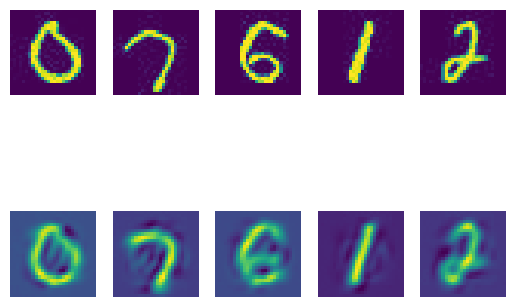

In [131]:
class1 = train_data[0+100, :]
class2 = train_data[2277+100, :]
class3 = train_data[2*2277+100, :]
class4 = train_data[3*2277+100, :]
class5 = train_data[4*2277+100, :]

plt.figure()
plt.subplot(2,5,1)
# plt.title("Original")
plt.imshow(class1.reshape((28,28)))
plt.axis('off')

plt.subplot(2,5,2)
plt.imshow(class2.reshape((28,28)))
plt.axis('off')

plt.subplot(2,5,3)
plt.imshow(class3.reshape((28,28)))
plt.axis('off')

plt.subplot(2,5,4)
plt.imshow(class4.reshape((28,28)))
plt.axis('off')

plt.subplot(2,5,5)
plt.imshow(class5.reshape((28,28)))
plt.axis('off')

plt.subplot(2,5,6)
# plt.title("Original")
recon_class1 = model.predict(class1.reshape((1, -1)))
plt.imshow(recon_class1.reshape((28,28)))
plt.axis('off')

plt.subplot(2,5,7)
recon_class2 = model.predict(class2.reshape((1, -1)))
plt.imshow(recon_class2.reshape((28,28)))
plt.axis('off')

plt.subplot(2,5,8)
recon_class3 = model.predict(class3.reshape((1, -1)))
plt.imshow(recon_class3.reshape((28,28)))
plt.axis('off')

plt.subplot(2,5,9)
recon_class4 = model.predict(class4.reshape((1, -1)))
plt.imshow(recon_class4.reshape((28,28)))
plt.axis('off')

plt.subplot(2,5,10)
recon_class5 = model.predict(class5.reshape((1, -1)))
plt.imshow(recon_class5.reshape((28,28)))
plt.axis('off')
plt.savefig('train_recon_32_1layer.png')


1/1 [==============================] - 0s 7ms/step


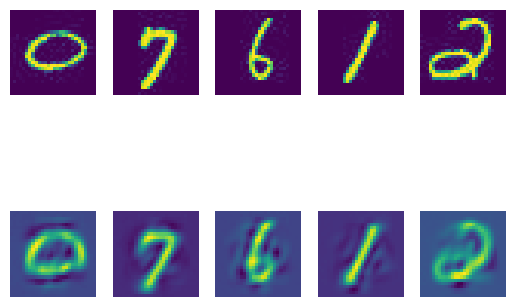

In [132]:
class1 = test_data[0+100, :]
class2 = test_data[759+100, :]
class3 = test_data[2*759+100, :]
class4 = test_data[3*759+100, :]
class5 = test_data[4*759+100, :]
# model.summary()

plt.figure()
plt.subplot(2,5,1)
# plt.title("Original")
plt.imshow(class1.reshape((28,28)))
plt.axis('off')

plt.subplot(2,5,2)
plt.imshow(class2.reshape((28,28)))
plt.axis('off')

plt.subplot(2,5,3)
plt.imshow(class3.reshape((28,28)))
plt.axis('off')

plt.subplot(2,5,4)
plt.imshow(class4.reshape((28,28)))
plt.axis('off')

plt.subplot(2,5,5)
plt.imshow(class5.reshape((28,28)))
plt.axis('off')

plt.subplot(2,5,6)
# plt.title("Original")
recon_class1 = model.predict(class1.reshape((1, -1)))
plt.imshow(recon_class1.reshape((28,28)))
plt.axis('off')

plt.subplot(2,5,7)
recon_class2 = model.predict(class2.reshape((1, -1)))
plt.imshow(recon_class2.reshape((28,28)))
plt.axis('off')

plt.subplot(2,5,8)
recon_class3 = model.predict(class3.reshape((1, -1)))
plt.imshow(recon_class3.reshape((28,28)))
plt.axis('off')

plt.subplot(2,5,9)
recon_class4 = model.predict(class4.reshape((1, -1)))
plt.imshow(recon_class4.reshape((28,28)))
plt.axis('off')

plt.subplot(2,5,10)
recon_class5 = model.predict(class5.reshape((1, -1)))
plt.imshow(recon_class5.reshape((28,28)))
plt.axis('off')
plt.savefig('test_recon_32_1layer.png')


1/1 [==============================] - 0s 8ms/step


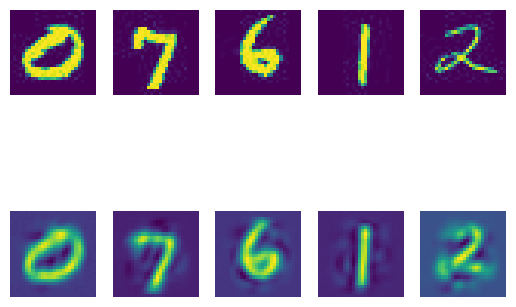

In [133]:
class1 = val_data[0+100, :]
class2 = val_data[759+100, :]
class3 = val_data[2*759+100, :]
class4 = val_data[3*759+100, :]
class5 = val_data[4*759+100, :]
# model.summary()

plt.figure()
plt.subplot(2,5,1)
# plt.title("Original")
plt.imshow(class1.reshape((28,28)))
plt.axis('off')

plt.subplot(2,5,2)
plt.imshow(class2.reshape((28,28)))
plt.axis('off')

plt.subplot(2,5,3)
plt.imshow(class3.reshape((28,28)))
plt.axis('off')

plt.subplot(2,5,4)
plt.imshow(class4.reshape((28,28)))
plt.axis('off')

plt.subplot(2,5,5)
plt.imshow(class5.reshape((28,28)))
plt.axis('off')

plt.subplot(2,5,6)
# plt.title("Original")
recon_class1 = model.predict(class1.reshape((1, -1)))
plt.imshow(recon_class1.reshape((28,28)))
plt.axis('off')

plt.subplot(2,5,7)
recon_class2 = model.predict(class2.reshape((1, -1)))
plt.imshow(recon_class2.reshape((28,28)))
plt.axis('off')

plt.subplot(2,5,8)
recon_class3 = model.predict(class3.reshape((1, -1)))
plt.imshow(recon_class3.reshape((28,28)))
plt.axis('off')

plt.subplot(2,5,9)
recon_class4 = model.predict(class4.reshape((1, -1)))
plt.imshow(recon_class4.reshape((28,28)))
plt.axis('off')

plt.subplot(2,5,10)
recon_class5 = model.predict(class5.reshape((1, -1)))
plt.imshow(recon_class5.reshape((28,28)))
plt.axis('off')
plt.savefig('val_recon_32_1layer.png')


In [134]:
train_pred = model.predict(train_data)
test_pred = model.predict(test_data)
val_pred = model.predict(val_data)

print("Reconstrunction error")
print("Training: ", np.average(((train_data - train_pred)**2)))
print("Testing: ", np.average(((test_data - test_pred)**2)))
print("Validation: ", np.average(((val_data - val_pred)**2)))


119/119 [==============================] - 0s 300us/step
Reconstrunction error
Training:  0.015034530511421024
Testing:  0.015273363283388993
Validation:  0.015058644791901712


### Model 1

In [135]:
encoder = load_model("./autoencoder_models/encoder_1layer_32.h5")
encoded_train = encoder.predict(train_data)
encoded_test = encoder.predict(test_data)
encoded_val = encoder.predict(val_data)

119/119 [==============================] - 0s 254us/step


In [136]:
inputs = Input(shape=(32,), name="Input")
x = Dense(16, activation='tanh', name="Layer1")(inputs)
x = Dense(8, activation='tanh', name="Layer2")(x)
# x = Dense(128, activation='tanh', name="Layer3")(x)
# x = Dense(64, activation='tanh', name="Layer4")(x)
outputs = Dense(5, activation='softmax', name="Output")(x)
model = Model(inputs=inputs, outputs=outputs, name=f"Model-encoder{32}")
model.summary()

adam_optimizer = Adam(learning_rate = 0.001)

model.compile(optimizer=adam_optimizer,
                loss="sparse_categorical_crossentropy",
                metrics=['accuracy'])
earlystopping = EarlyStopping(monitor='loss',
                                min_delta=1e-4,
                                patience=5,
                                verbose=1)
history1 = model.fit(x=encoded_train, y=train_labels,
                        batch_size=32, epochs=100_000,
                        callbacks=[earlystopping],
                        verbose=0, shuffle=True,
                        validation_split=0.0)

Model: "Model-encoder32"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input (InputLayer)          [(None, 32)]              0         
                                                                 
 Layer1 (Dense)              (None, 16)                528       
                                                                 
 Layer2 (Dense)              (None, 8)                 136       
                                                                 
 Output (Dense)              (None, 5)                 45        
                                                                 
Total params: 709
Trainable params: 709
Non-trainable params: 0
_________________________________________________________________
Epoch 174: early stopping


In [137]:
print("Training data evaluation")
model.evaluate(encoded_train, train_labels)
print("Testing data evaluation")
model.evaluate(encoded_test, test_labels)
print("Validation data evaluation")
model.evaluate(encoded_val, val_labels)
print()

Training data evaluation
356/356 [==============================] - 0s 251us/step - loss: 0.0023 - accuracy: 0.9999
Testing data evaluation
119/119 [==============================] - 0s 257us/step - loss: 0.1119 - accuracy: 0.9792
Validation data evaluation
119/119 [==============================] - 0s 495us/step - loss: 0.1057 - accuracy: 0.9802



### Model 2

In [138]:
inputs = Input(shape=(32,), name="Input")
x = Dense(256, activation='tanh', name="Layer1")(inputs)
x = Dense(128, activation='tanh', name="Layer2")(x)
x = Dense(64, activation='tanh', name="Layer3")(x)
x = Dense(32, activation='tanh', name="Layer4")(x)
outputs = Dense(5, activation='softmax', name="Output")(x)
model = Model(inputs=inputs, outputs=outputs, name=f"Model-encoder{32}")
model.summary()

adam_optimizer = Adam(learning_rate = 0.001)

model.compile(optimizer=adam_optimizer,
                    loss="sparse_categorical_crossentropy",
                    metrics=['accuracy'])
earlystopping = EarlyStopping(monitor='loss',
                                        min_delta=1e-4,
                                        patience=5,
                                        verbose=1)
history1 = model.fit(x=encoded_train, y=train_labels,
                        batch_size=32, epochs=100_000,
                        callbacks=[earlystopping],
                        verbose=0, shuffle=True,
                        validation_split=0.0)

Model: "Model-encoder32"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input (InputLayer)          [(None, 32)]              0         
                                                                 
 Layer1 (Dense)              (None, 256)               8448      
                                                                 
 Layer2 (Dense)              (None, 128)               32896     
                                                                 
 Layer3 (Dense)              (None, 64)                8256      
                                                                 
 Layer4 (Dense)              (None, 32)                2080      
                                                                 
 Output (Dense)              (None, 5)                 165       
                                                                 
Total params: 51,845
Trainable params: 51,845
Non-t

In [139]:
print("Training data evaluation")
model.evaluate(encoded_train, train_labels)
print("Testing data evaluation")
model.evaluate(encoded_test, test_labels)
print("Validation data evaluation")
model.evaluate(encoded_val, val_labels)
print()

Training data evaluation
356/356 [==============================] - 0s 326us/step - loss: 4.9694e-04 - accuracy: 1.0000
Testing data evaluation
119/119 [==============================] - 0s 354us/step - loss: 0.0728 - accuracy: 0.9842
Validation data evaluation
119/119 [==============================] - 0s 337us/step - loss: 0.0547 - accuracy: 0.9868



## Three layer 32 bottleneck

In [32]:
model = load_model("./autoencoder_models/autoencoder_3layer_32.h5")
model.summary()

Model: "Autoencoder32"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Encoder-input (InputLayer)  [(None, 784)]             0         
                                                                 
 Encoder-hidden (Dense)      (None, 400)               314000    
                                                                 
 Bottleneck-layer (Dense)    (None, 32)                12832     
                                                                 
 Decoder-hidden (Dense)      (None, 400)               13200     
                                                                 
 Decoder-output (Dense)      (None, 784)               314384    
                                                                 
Total params: 654,416
Trainable params: 654,416
Non-trainable params: 0
_________________________________________________________________


1/1 [==============================] - 0s 8ms/step


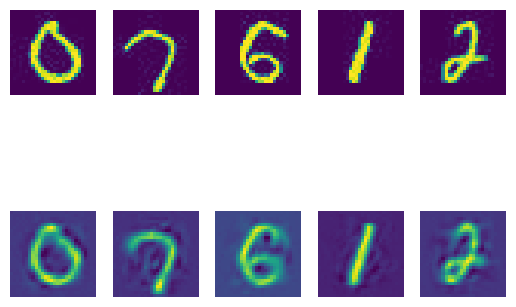

In [33]:
class1 = train_data[0+100, :]
class2 = train_data[2277+100, :]
class3 = train_data[2*2277+100, :]
class4 = train_data[3*2277+100, :]
class5 = train_data[4*2277+100, :]

plt.figure()
plt.subplot(2,5,1)
# plt.title("Original")
plt.imshow(class1.reshape((28,28)))
plt.axis('off')

plt.subplot(2,5,2)
plt.imshow(class2.reshape((28,28)))
plt.axis('off')

plt.subplot(2,5,3)
plt.imshow(class3.reshape((28,28)))
plt.axis('off')

plt.subplot(2,5,4)
plt.imshow(class4.reshape((28,28)))
plt.axis('off')

plt.subplot(2,5,5)
plt.imshow(class5.reshape((28,28)))
plt.axis('off')

plt.subplot(2,5,6)
# plt.title("Original")
recon_class1 = model.predict(class1.reshape((1, -1)))
plt.imshow(recon_class1.reshape((28,28)))
plt.axis('off')

plt.subplot(2,5,7)
recon_class2 = model.predict(class2.reshape((1, -1)))
plt.imshow(recon_class2.reshape((28,28)))
plt.axis('off')

plt.subplot(2,5,8)
recon_class3 = model.predict(class3.reshape((1, -1)))
plt.imshow(recon_class3.reshape((28,28)))
plt.axis('off')

plt.subplot(2,5,9)
recon_class4 = model.predict(class4.reshape((1, -1)))
plt.imshow(recon_class4.reshape((28,28)))
plt.axis('off')

plt.subplot(2,5,10)
recon_class5 = model.predict(class5.reshape((1, -1)))
plt.imshow(recon_class5.reshape((28,28)))
plt.axis('off')
plt.savefig('train_recon_32_3layer.png')


1/1 [==============================] - 0s 9ms/step


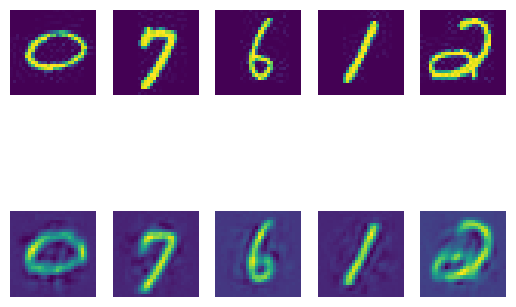

In [34]:
class1 = test_data[0+100, :]
class2 = test_data[759+100, :]
class3 = test_data[2*759+100, :]
class4 = test_data[3*759+100, :]
class5 = test_data[4*759+100, :]
# model.summary()

plt.figure()
plt.subplot(2,5,1)
# plt.title("Original")
plt.imshow(class1.reshape((28,28)))
plt.axis('off')

plt.subplot(2,5,2)
plt.imshow(class2.reshape((28,28)))
plt.axis('off')

plt.subplot(2,5,3)
plt.imshow(class3.reshape((28,28)))
plt.axis('off')

plt.subplot(2,5,4)
plt.imshow(class4.reshape((28,28)))
plt.axis('off')

plt.subplot(2,5,5)
plt.imshow(class5.reshape((28,28)))
plt.axis('off')

plt.subplot(2,5,6)
# plt.title("Original")
recon_class1 = model.predict(class1.reshape((1, -1)))
plt.imshow(recon_class1.reshape((28,28)))
plt.axis('off')

plt.subplot(2,5,7)
recon_class2 = model.predict(class2.reshape((1, -1)))
plt.imshow(recon_class2.reshape((28,28)))
plt.axis('off')

plt.subplot(2,5,8)
recon_class3 = model.predict(class3.reshape((1, -1)))
plt.imshow(recon_class3.reshape((28,28)))
plt.axis('off')

plt.subplot(2,5,9)
recon_class4 = model.predict(class4.reshape((1, -1)))
plt.imshow(recon_class4.reshape((28,28)))
plt.axis('off')

plt.subplot(2,5,10)
recon_class5 = model.predict(class5.reshape((1, -1)))
plt.imshow(recon_class5.reshape((28,28)))
plt.axis('off')
plt.savefig('test_recon_32_3layer.png')


1/1 [==============================] - 0s 10ms/step


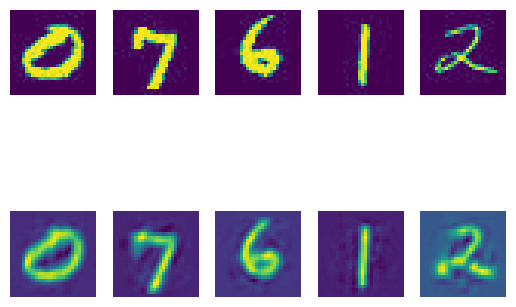

In [35]:
class1 = val_data[0+100, :]
class2 = val_data[759+100, :]
class3 = val_data[2*759+100, :]
class4 = val_data[3*759+100, :]
class5 = val_data[4*759+100, :]
# model.summary()

plt.figure()
plt.subplot(2,5,1)
# plt.title("Original")
plt.imshow(class1.reshape((28,28)))
plt.axis('off')

plt.subplot(2,5,2)
plt.imshow(class2.reshape((28,28)))
plt.axis('off')

plt.subplot(2,5,3)
plt.imshow(class3.reshape((28,28)))
plt.axis('off')

plt.subplot(2,5,4)
plt.imshow(class4.reshape((28,28)))
plt.axis('off')

plt.subplot(2,5,5)
plt.imshow(class5.reshape((28,28)))
plt.axis('off')

plt.subplot(2,5,6)
# plt.title("Original")
recon_class1 = model.predict(class1.reshape((1, -1)))
plt.imshow(recon_class1.reshape((28,28)))
plt.axis('off')

plt.subplot(2,5,7)
recon_class2 = model.predict(class2.reshape((1, -1)))
plt.imshow(recon_class2.reshape((28,28)))
plt.axis('off')

plt.subplot(2,5,8)
recon_class3 = model.predict(class3.reshape((1, -1)))
plt.imshow(recon_class3.reshape((28,28)))
plt.axis('off')

plt.subplot(2,5,9)
recon_class4 = model.predict(class4.reshape((1, -1)))
plt.imshow(recon_class4.reshape((28,28)))
plt.axis('off')

plt.subplot(2,5,10)
recon_class5 = model.predict(class5.reshape((1, -1)))
plt.imshow(recon_class5.reshape((28,28)))
plt.axis('off')
plt.savefig('val_recon_32_3layer.png')


In [36]:
train_pred = model.predict(train_data)
test_pred = model.predict(test_data)
val_pred = model.predict(val_data)

print("Reconstrunction error")
print("Training: ", np.average(((train_data - train_pred)**2)))
print("Testing: ", np.average(((test_data - test_pred)**2)))
print("Validation: ", np.average(((val_data - val_pred)**2)))


119/119 [==============================] - 0s 1ms/step
Reconstrunction error
Training:  0.010471762253536075
Testing:  0.010998262778425593
Validation:  0.010836487804328745


### Model 1

In [37]:
encoder = load_model("./autoencoder_models/encoder_3layer_32.h5")
encoded_train = encoder.predict(train_data)
encoded_test = encoder.predict(test_data)
encoded_val = encoder.predict(val_data)

119/119 [==============================] - 0s 432us/step


In [38]:
inputs = Input(shape=(32,), name="Input")
x = Dense(16, activation='tanh', name="Layer1")(inputs)
x = Dense(8, activation='tanh', name="Layer2")(x)
# x = Dense(128, activation='tanh', name="Layer3")(x)
# x = Dense(64, activation='tanh', name="Layer4")(x)
outputs = Dense(5, activation='softmax', name="Output")(x)
model = Model(inputs=inputs, outputs=outputs, name=f"Model-encoder{32}")
model.summary()

adam_optimizer = Adam(learning_rate = 0.001)

model.compile(optimizer=adam_optimizer,
                    loss="sparse_categorical_crossentropy",
                    metrics=['accuracy'])
earlystopping = EarlyStopping(monitor='loss',
                                        min_delta=1e-4,
                                        patience=5,
                                        verbose=1)
history1 = model.fit(x=encoded_train, y=train_labels,
                        batch_size=32, epochs=100_000,
                        callbacks=[earlystopping],
                        verbose=0, shuffle=True,
                        validation_split=0.0)

Model: "Model-encoder32"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input (InputLayer)          [(None, 32)]              0         
                                                                 
 Layer1 (Dense)              (None, 16)                528       
                                                                 
 Layer2 (Dense)              (None, 8)                 136       
                                                                 
 Output (Dense)              (None, 5)                 45        
                                                                 
Total params: 709
Trainable params: 709
Non-trainable params: 0
_________________________________________________________________
Epoch 178: early stopping


In [39]:
print("Training data evaluation")
model.evaluate(encoded_train, train_labels)
print("Testing data evaluation")
model.evaluate(encoded_test, test_labels)
print("Validation data evaluation")
model.evaluate(encoded_val, val_labels)
print()

Training data evaluation
356/356 [==============================] - 0s 251us/step - loss: 0.0027 - accuracy: 0.9997
Testing data evaluation
119/119 [==============================] - 0s 248us/step - loss: 0.1288 - accuracy: 0.9802
Validation data evaluation
119/119 [==============================] - 0s 258us/step - loss: 0.1076 - accuracy: 0.9821



### Model 2

In [40]:
inputs = Input(shape=(32,), name="Input")
x = Dense(256, activation='tanh', name="Layer1")(inputs)
x = Dense(128, activation='tanh', name="Layer2")(x)
x = Dense(64, activation='tanh', name="Layer3")(x)
x = Dense(32, activation='tanh', name="Layer4")(x)
outputs = Dense(5, activation='softmax', name="Output")(x)
model = Model(inputs=inputs, outputs=outputs, name=f"Model-encoder{32}")
model.summary()

adam_optimizer = Adam(learning_rate = 0.001)

model.compile(optimizer=adam_optimizer,
                    loss="sparse_categorical_crossentropy",
                    metrics=['accuracy'])
earlystopping = EarlyStopping(monitor='loss',
                                        min_delta=1e-4,
                                        patience=5,
                                        verbose=1)
history1 = model.fit(x=encoded_train, y=train_labels,
                        batch_size=32, epochs=100_000,
                        callbacks=[earlystopping],
                        verbose=0, shuffle=True,
                        validation_split=0.0)

Model: "Model-encoder32"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input (InputLayer)          [(None, 32)]              0         
                                                                 
 Layer1 (Dense)              (None, 256)               8448      
                                                                 
 Layer2 (Dense)              (None, 128)               32896     
                                                                 
 Layer3 (Dense)              (None, 64)                8256      
                                                                 
 Layer4 (Dense)              (None, 32)                2080      
                                                                 
 Output (Dense)              (None, 5)                 165       
                                                                 
Total params: 51,845
Trainable params: 51,845
Non-t

In [41]:
print("Training data evaluation")
model.evaluate(encoded_train, train_labels)
print("Testing data evaluation")
model.evaluate(encoded_test, test_labels)
print("Validation data evaluation")
model.evaluate(encoded_val, val_labels)
print()

Training data evaluation
356/356 [==============================] - 0s 322us/step - loss: 0.0052 - accuracy: 0.9982
Testing data evaluation
119/119 [==============================] - 0s 318us/step - loss: 0.0899 - accuracy: 0.9823
Validation data evaluation
119/119 [==============================] - 0s 322us/step - loss: 0.0738 - accuracy: 0.9831



## One layer 64 bottleneck

In [42]:
model = load_model("./autoencoder_models/autoencoder_1layer_64.h5")
model.summary()

Model: "Autoencoder64"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Encoder-input (InputLayer)  [(None, 784)]             0         
                                                                 
 Bottleneck-layer (Dense)    (None, 64)                50240     
                                                                 
 Decoder-output (Dense)      (None, 784)               50960     
                                                                 
Total params: 101,200
Trainable params: 101,200
Non-trainable params: 0
_________________________________________________________________


1/1 [==============================] - 0s 7ms/step


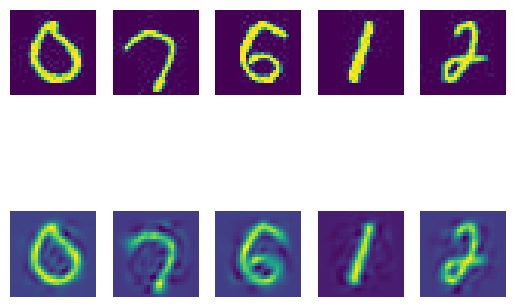

In [43]:
class1 = train_data[0+100, :]
class2 = train_data[2277+100, :]
class3 = train_data[2*2277+100, :]
class4 = train_data[3*2277+100, :]
class5 = train_data[4*2277+100, :]

plt.figure()
plt.subplot(2,5,1)
# plt.title("Original")
plt.imshow(class1.reshape((28,28)))
plt.axis('off')

plt.subplot(2,5,2)
plt.imshow(class2.reshape((28,28)))
plt.axis('off')

plt.subplot(2,5,3)
plt.imshow(class3.reshape((28,28)))
plt.axis('off')

plt.subplot(2,5,4)
plt.imshow(class4.reshape((28,28)))
plt.axis('off')

plt.subplot(2,5,5)
plt.imshow(class5.reshape((28,28)))
plt.axis('off')

plt.subplot(2,5,6)
# plt.title("Original")
recon_class1 = model.predict(class1.reshape((1, -1)))
plt.imshow(recon_class1.reshape((28,28)))
plt.axis('off')

plt.subplot(2,5,7)
recon_class2 = model.predict(class2.reshape((1, -1)))
plt.imshow(recon_class2.reshape((28,28)))
plt.axis('off')

plt.subplot(2,5,8)
recon_class3 = model.predict(class3.reshape((1, -1)))
plt.imshow(recon_class3.reshape((28,28)))
plt.axis('off')

plt.subplot(2,5,9)
recon_class4 = model.predict(class4.reshape((1, -1)))
plt.imshow(recon_class4.reshape((28,28)))
plt.axis('off')

plt.subplot(2,5,10)
recon_class5 = model.predict(class5.reshape((1, -1)))
plt.imshow(recon_class5.reshape((28,28)))
plt.axis('off')
plt.savefig('train_recon_64_1layer.png')


1/1 [==============================] - 0s 7ms/step


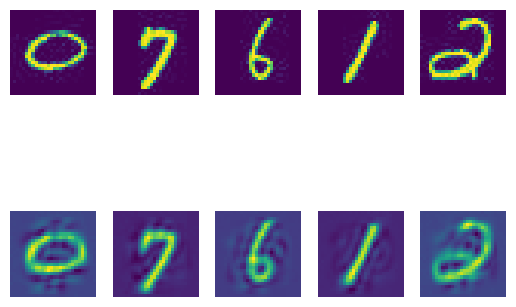

In [44]:
class1 = test_data[0+100, :]
class2 = test_data[759+100, :]
class3 = test_data[2*759+100, :]
class4 = test_data[3*759+100, :]
class5 = test_data[4*759+100, :]
# model.summary()

plt.figure()
plt.subplot(2,5,1)
# plt.title("Original")
plt.imshow(class1.reshape((28,28)))
plt.axis('off')

plt.subplot(2,5,2)
plt.imshow(class2.reshape((28,28)))
plt.axis('off')

plt.subplot(2,5,3)
plt.imshow(class3.reshape((28,28)))
plt.axis('off')

plt.subplot(2,5,4)
plt.imshow(class4.reshape((28,28)))
plt.axis('off')

plt.subplot(2,5,5)
plt.imshow(class5.reshape((28,28)))
plt.axis('off')

plt.subplot(2,5,6)
# plt.title("Original")
recon_class1 = model.predict(class1.reshape((1, -1)))
plt.imshow(recon_class1.reshape((28,28)))
plt.axis('off')

plt.subplot(2,5,7)
recon_class2 = model.predict(class2.reshape((1, -1)))
plt.imshow(recon_class2.reshape((28,28)))
plt.axis('off')

plt.subplot(2,5,8)
recon_class3 = model.predict(class3.reshape((1, -1)))
plt.imshow(recon_class3.reshape((28,28)))
plt.axis('off')

plt.subplot(2,5,9)
recon_class4 = model.predict(class4.reshape((1, -1)))
plt.imshow(recon_class4.reshape((28,28)))
plt.axis('off')

plt.subplot(2,5,10)
recon_class5 = model.predict(class5.reshape((1, -1)))
plt.imshow(recon_class5.reshape((28,28)))
plt.axis('off')
plt.savefig('test_recon_64_1layer.png')


1/1 [==============================] - 0s 8ms/step


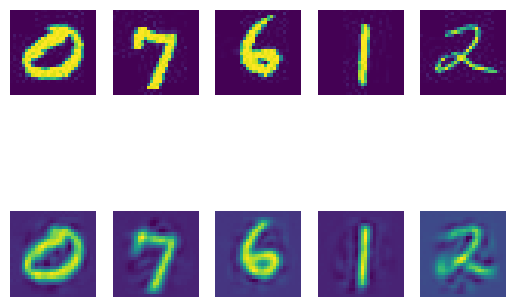

In [45]:
class1 = val_data[0+100, :]
class2 = val_data[759+100, :]
class3 = val_data[2*759+100, :]
class4 = val_data[3*759+100, :]
class5 = val_data[4*759+100, :]
# model.summary()

plt.figure()
plt.subplot(2,5,1)
# plt.title("Original")
plt.imshow(class1.reshape((28,28)))
plt.axis('off')

plt.subplot(2,5,2)
plt.imshow(class2.reshape((28,28)))
plt.axis('off')

plt.subplot(2,5,3)
plt.imshow(class3.reshape((28,28)))
plt.axis('off')

plt.subplot(2,5,4)
plt.imshow(class4.reshape((28,28)))
plt.axis('off')

plt.subplot(2,5,5)
plt.imshow(class5.reshape((28,28)))
plt.axis('off')

plt.subplot(2,5,6)
# plt.title("Original")
recon_class1 = model.predict(class1.reshape((1, -1)))
plt.imshow(recon_class1.reshape((28,28)))
plt.axis('off')

plt.subplot(2,5,7)
recon_class2 = model.predict(class2.reshape((1, -1)))
plt.imshow(recon_class2.reshape((28,28)))
plt.axis('off')

plt.subplot(2,5,8)
recon_class3 = model.predict(class3.reshape((1, -1)))
plt.imshow(recon_class3.reshape((28,28)))
plt.axis('off')

plt.subplot(2,5,9)
recon_class4 = model.predict(class4.reshape((1, -1)))
plt.imshow(recon_class4.reshape((28,28)))
plt.axis('off')

plt.subplot(2,5,10)
recon_class5 = model.predict(class5.reshape((1, -1)))
plt.imshow(recon_class5.reshape((28,28)))
plt.axis('off')
plt.savefig('val_recon_64_1layer.png')


In [46]:
train_pred = model.predict(train_data)
test_pred = model.predict(test_data)
val_pred = model.predict(val_data)

print("Reconstrunction error")
print("Training: ", np.average(((train_data - train_pred)**2)))
print("Testing: ", np.average(((test_data - test_pred)**2)))
print("Validation: ", np.average(((val_data - val_pred)**2)))


119/119 [==============================] - 0s 305us/step
Reconstrunction error
Training:  0.00850317306810426
Testing:  0.008713613196353378
Validation:  0.008583333307997234


### Model 1

In [47]:
encoder = load_model("./autoencoder_models/encoder_1layer_64.h5")
encoded_train = encoder.predict(train_data)
encoded_test = encoder.predict(test_data)
encoded_val = encoder.predict(val_data)

119/119 [==============================] - 0s 258us/step


In [48]:
inputs = Input(shape=(64,), name="Input")
x = Dense(16, activation='tanh', name="Layer1")(inputs)
x = Dense(8, activation='tanh', name="Layer2")(x)
# x = Dense(128, activation='tanh', name="Layer3")(x)
# x = Dense(64, activation='tanh', name="Layer4")(x)
outputs = Dense(5, activation='softmax', name="Output")(x)
model = Model(inputs=inputs, outputs=outputs, name=f"Model-encoder{64}")
model.summary()

adam_optimizer = Adam(learning_rate = 0.001)

model.compile(optimizer=adam_optimizer,
                loss="sparse_categorical_crossentropy",
                metrics=['accuracy'])
earlystopping = EarlyStopping(monitor='loss',
                                min_delta=1e-4,
                                patience=5,
                                verbose=1)
history1 = model.fit(x=encoded_train, y=train_labels,
                        batch_size=32, epochs=100_000,
                        callbacks=[earlystopping],
                        verbose=0, shuffle=True,
                        validation_split=0.0)

Model: "Model-encoder64"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input (InputLayer)          [(None, 64)]              0         
                                                                 
 Layer1 (Dense)              (None, 16)                1040      
                                                                 
 Layer2 (Dense)              (None, 8)                 136       
                                                                 
 Output (Dense)              (None, 5)                 45        
                                                                 
Total params: 1,221
Trainable params: 1,221
Non-trainable params: 0
_________________________________________________________________
Epoch 112: early stopping


In [49]:
print("Training data evaluation")
model.evaluate(encoded_train, train_labels)
print("Testing data evaluation")
model.evaluate(encoded_test, test_labels)
print("Validation data evaluation")
model.evaluate(encoded_val, val_labels)
print()

Training data evaluation
356/356 [==============================] - 0s 254us/step - loss: 0.0014 - accuracy: 0.9997
Testing data evaluation
119/119 [==============================] - 0s 247us/step - loss: 0.1176 - accuracy: 0.9821
Validation data evaluation
119/119 [==============================] - 0s 253us/step - loss: 0.0944 - accuracy: 0.9829



### Model 2

In [50]:
inputs = Input(shape=(64,), name="Input")
x = Dense(256, activation='tanh', name="Layer1")(inputs)
x = Dense(128, activation='tanh', name="Layer2")(x)
x = Dense(64, activation='tanh', name="Layer3")(x)
x = Dense(32, activation='tanh', name="Layer4")(x)
outputs = Dense(5, activation='softmax', name="Output")(x)
model = Model(inputs=inputs, outputs=outputs, name=f"Model-encoder{64}")
model.summary()

adam_optimizer = Adam(learning_rate = 0.001)

model.compile(optimizer=adam_optimizer,
                    loss="sparse_categorical_crossentropy",
                    metrics=['accuracy'])
earlystopping = EarlyStopping(monitor='loss',
                                        min_delta=1e-4,
                                        patience=5,
                                        verbose=1)
history1 = model.fit(x=encoded_train, y=train_labels,
                        batch_size=32, epochs=100_000,
                        callbacks=[earlystopping],
                        verbose=0, shuffle=True,
                        validation_split=0.0)

Model: "Model-encoder64"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input (InputLayer)          [(None, 64)]              0         
                                                                 
 Layer1 (Dense)              (None, 256)               16640     
                                                                 
 Layer2 (Dense)              (None, 128)               32896     
                                                                 
 Layer3 (Dense)              (None, 64)                8256      
                                                                 
 Layer4 (Dense)              (None, 32)                2080      
                                                                 
 Output (Dense)              (None, 5)                 165       
                                                                 
Total params: 60,037
Trainable params: 60,037
Non-t

In [51]:
print("Training data evaluation")
model.evaluate(encoded_train, train_labels)
print("Testing data evaluation")
model.evaluate(encoded_test, test_labels)
print("Validation data evaluation")
model.evaluate(encoded_val, val_labels)
print()

Training data evaluation
356/356 [==============================] - 0s 327us/step - loss: 0.0059 - accuracy: 0.9979
Testing data evaluation
119/119 [==============================] - 0s 329us/step - loss: 0.0913 - accuracy: 0.9837
Validation data evaluation
119/119 [==============================] - 0s 303us/step - loss: 0.0737 - accuracy: 0.9842



## Three layer 64 bottleneck

In [52]:
model = load_model("./autoencoder_models/autoencoder_3layer_64.h5")
model.summary()

Model: "Autoencoder64"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Encoder-input (InputLayer)  [(None, 784)]             0         
                                                                 
 Encoder-hidden (Dense)      (None, 400)               314000    
                                                                 
 Bottleneck-layer (Dense)    (None, 64)                25664     
                                                                 
 Decoder-hidden (Dense)      (None, 400)               26000     
                                                                 
 Decoder-output (Dense)      (None, 784)               314384    
                                                                 
Total params: 680,048
Trainable params: 680,048
Non-trainable params: 0
_________________________________________________________________


1/1 [==============================] - 0s 8ms/step


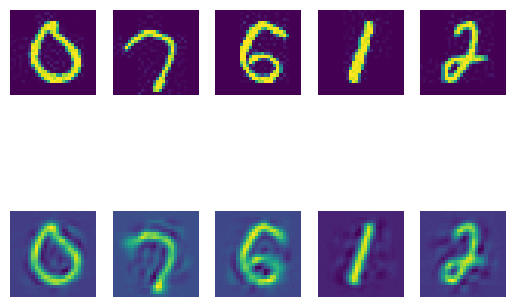

In [53]:
class1 = train_data[0+100, :]
class2 = train_data[2277+100, :]
class3 = train_data[2*2277+100, :]
class4 = train_data[3*2277+100, :]
class5 = train_data[4*2277+100, :]

plt.figure()
plt.subplot(2,5,1)
# plt.title("Original")
plt.imshow(class1.reshape((28,28)))
plt.axis('off')

plt.subplot(2,5,2)
plt.imshow(class2.reshape((28,28)))
plt.axis('off')

plt.subplot(2,5,3)
plt.imshow(class3.reshape((28,28)))
plt.axis('off')

plt.subplot(2,5,4)
plt.imshow(class4.reshape((28,28)))
plt.axis('off')

plt.subplot(2,5,5)
plt.imshow(class5.reshape((28,28)))
plt.axis('off')

plt.subplot(2,5,6)
# plt.title("Original")
recon_class1 = model.predict(class1.reshape((1, -1)))
plt.imshow(recon_class1.reshape((28,28)))
plt.axis('off')

plt.subplot(2,5,7)
recon_class2 = model.predict(class2.reshape((1, -1)))
plt.imshow(recon_class2.reshape((28,28)))
plt.axis('off')

plt.subplot(2,5,8)
recon_class3 = model.predict(class3.reshape((1, -1)))
plt.imshow(recon_class3.reshape((28,28)))
plt.axis('off')

plt.subplot(2,5,9)
recon_class4 = model.predict(class4.reshape((1, -1)))
plt.imshow(recon_class4.reshape((28,28)))
plt.axis('off')

plt.subplot(2,5,10)
recon_class5 = model.predict(class5.reshape((1, -1)))
plt.imshow(recon_class5.reshape((28,28)))
plt.axis('off')
plt.savefig('train_recon_64_3layer.png')


1/1 [==============================] - 0s 8ms/step


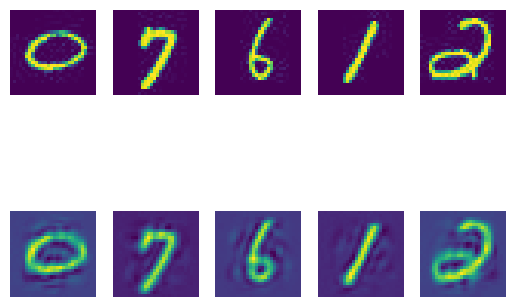

In [54]:
class1 = test_data[0+100, :]
class2 = test_data[759+100, :]
class3 = test_data[2*759+100, :]
class4 = test_data[3*759+100, :]
class5 = test_data[4*759+100, :]
# model.summary()

plt.figure()
plt.subplot(2,5,1)
# plt.title("Original")
plt.imshow(class1.reshape((28,28)))
plt.axis('off')

plt.subplot(2,5,2)
plt.imshow(class2.reshape((28,28)))
plt.axis('off')

plt.subplot(2,5,3)
plt.imshow(class3.reshape((28,28)))
plt.axis('off')

plt.subplot(2,5,4)
plt.imshow(class4.reshape((28,28)))
plt.axis('off')

plt.subplot(2,5,5)
plt.imshow(class5.reshape((28,28)))
plt.axis('off')

plt.subplot(2,5,6)
# plt.title("Original")
recon_class1 = model.predict(class1.reshape((1, -1)))
plt.imshow(recon_class1.reshape((28,28)))
plt.axis('off')

plt.subplot(2,5,7)
recon_class2 = model.predict(class2.reshape((1, -1)))
plt.imshow(recon_class2.reshape((28,28)))
plt.axis('off')

plt.subplot(2,5,8)
recon_class3 = model.predict(class3.reshape((1, -1)))
plt.imshow(recon_class3.reshape((28,28)))
plt.axis('off')

plt.subplot(2,5,9)
recon_class4 = model.predict(class4.reshape((1, -1)))
plt.imshow(recon_class4.reshape((28,28)))
plt.axis('off')

plt.subplot(2,5,10)
recon_class5 = model.predict(class5.reshape((1, -1)))
plt.imshow(recon_class5.reshape((28,28)))
plt.axis('off')
plt.savefig('test_recon_64_3layer.png')


1/1 [==============================] - 0s 8ms/step


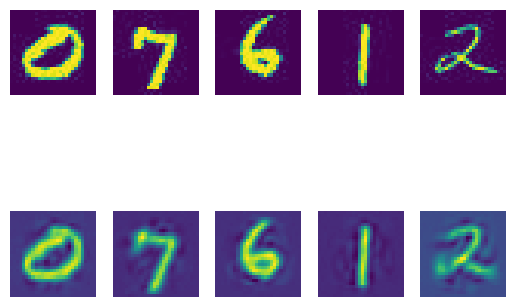

In [55]:
class1 = val_data[0+100, :]
class2 = val_data[759+100, :]
class3 = val_data[2*759+100, :]
class4 = val_data[3*759+100, :]
class5 = val_data[4*759+100, :]
# model.summary()

plt.figure()
plt.subplot(2,5,1)
# plt.title("Original")
plt.imshow(class1.reshape((28,28)))
plt.axis('off')

plt.subplot(2,5,2)
plt.imshow(class2.reshape((28,28)))
plt.axis('off')

plt.subplot(2,5,3)
plt.imshow(class3.reshape((28,28)))
plt.axis('off')

plt.subplot(2,5,4)
plt.imshow(class4.reshape((28,28)))
plt.axis('off')

plt.subplot(2,5,5)
plt.imshow(class5.reshape((28,28)))
plt.axis('off')

plt.subplot(2,5,6)
# plt.title("Original")
recon_class1 = model.predict(class1.reshape((1, -1)))
plt.imshow(recon_class1.reshape((28,28)))
plt.axis('off')

plt.subplot(2,5,7)
recon_class2 = model.predict(class2.reshape((1, -1)))
plt.imshow(recon_class2.reshape((28,28)))
plt.axis('off')

plt.subplot(2,5,8)
recon_class3 = model.predict(class3.reshape((1, -1)))
plt.imshow(recon_class3.reshape((28,28)))
plt.axis('off')

plt.subplot(2,5,9)
recon_class4 = model.predict(class4.reshape((1, -1)))
plt.imshow(recon_class4.reshape((28,28)))
plt.axis('off')

plt.subplot(2,5,10)
recon_class5 = model.predict(class5.reshape((1, -1)))
plt.imshow(recon_class5.reshape((28,28)))
plt.axis('off')
plt.savefig('val_recon_64_3layer.png')


In [56]:
train_pred = model.predict(train_data)
test_pred = model.predict(test_data)
val_pred = model.predict(val_data)

print("Reconstrunction error")
print("Training: ", np.average(((train_data - train_pred)**2)))
print("Testing: ", np.average(((test_data - test_pred)**2)))
print("Validation: ", np.average(((val_data - val_pred)**2)))


119/119 [==============================] - 0s 631us/step
Reconstrunction error
Training:  0.008389854342556865
Testing:  0.008613229788318582
Validation:  0.008492834090600518


### Model 1

In [57]:
encoder = load_model("./autoencoder_models/encoder_3layer_64.h5")
encoded_train = encoder.predict(train_data)
encoded_test = encoder.predict(test_data)
encoded_val = encoder.predict(val_data)

119/119 [==============================] - 0s 379us/step


In [58]:
inputs = Input(shape=(64,), name="Input")
x = Dense(16, activation='tanh', name="Layer1")(inputs)
x = Dense(8, activation='tanh', name="Layer2")(x)
# x = Dense(128, activation='tanh', name="Layer3")(x)
# x = Dense(64, activation='tanh', name="Layer4")(x)
outputs = Dense(5, activation='softmax', name="Output")(x)
model = Model(inputs=inputs, outputs=outputs, name=f"Model-encoder{64}")
model.summary()

adam_optimizer = Adam(learning_rate = 0.001)

model.compile(optimizer=adam_optimizer,
                loss="sparse_categorical_crossentropy",
                metrics=['accuracy'])
earlystopping = EarlyStopping(monitor='loss',
                                min_delta=1e-4,
                                patience=5,
                                verbose=1)
history1 = model.fit(x=encoded_train, y=train_labels,
                        batch_size=32, epochs=100_000,
                        callbacks=[earlystopping],
                        verbose=0, shuffle=True,
                        validation_split=0.0)

Model: "Model-encoder64"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input (InputLayer)          [(None, 64)]              0         
                                                                 
 Layer1 (Dense)              (None, 16)                1040      
                                                                 
 Layer2 (Dense)              (None, 8)                 136       
                                                                 
 Output (Dense)              (None, 5)                 45        
                                                                 
Total params: 1,221
Trainable params: 1,221
Non-trainable params: 0
_________________________________________________________________
Epoch 133: early stopping


In [59]:
print("Training data evaluation")
model.evaluate(encoded_train, train_labels)
print("Testing data evaluation")
model.evaluate(encoded_test, test_labels)
print("Validation data evaluation")
model.evaluate(encoded_val, val_labels)
print()

Training data evaluation
356/356 [==============================] - 0s 248us/step - loss: 4.3137e-04 - accuracy: 1.0000
Testing data evaluation
119/119 [==============================] - 0s 250us/step - loss: 0.1276 - accuracy: 0.9816
Validation data evaluation
119/119 [==============================] - 0s 252us/step - loss: 0.1036 - accuracy: 0.9808



### Model 2

In [60]:
inputs = Input(shape=(64,), name="Input")
x = Dense(256, activation='tanh', name="Layer1")(inputs)
x = Dense(128, activation='tanh', name="Layer2")(x)
x = Dense(64, activation='tanh', name="Layer3")(x)
x = Dense(32, activation='tanh', name="Layer4")(x)
outputs = Dense(5, activation='softmax', name="Output")(x)
model = Model(inputs=inputs, outputs=outputs, name=f"Model-encoder{64}")
model.summary()

adam_optimizer = Adam(learning_rate = 0.001)

model.compile(optimizer=adam_optimizer,
                    loss="sparse_categorical_crossentropy",
                    metrics=['accuracy'])
earlystopping = EarlyStopping(monitor='loss',
                                        min_delta=1e-4,
                                        patience=5,
                                        verbose=1)
history1 = model.fit(x=encoded_train, y=train_labels,
                        batch_size=32, epochs=100_000,
                        callbacks=[earlystopping],
                        verbose=0, shuffle=True,
                        validation_split=0.0)

Model: "Model-encoder64"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input (InputLayer)          [(None, 64)]              0         
                                                                 
 Layer1 (Dense)              (None, 256)               16640     
                                                                 
 Layer2 (Dense)              (None, 128)               32896     
                                                                 
 Layer3 (Dense)              (None, 64)                8256      
                                                                 
 Layer4 (Dense)              (None, 32)                2080      
                                                                 
 Output (Dense)              (None, 5)                 165       
                                                                 
Total params: 60,037
Trainable params: 60,037
Non-t

In [61]:
print("Training data evaluation")
model.evaluate(encoded_train, train_labels)
print("Testing data evaluation")
model.evaluate(encoded_test, test_labels)
print("Validation data evaluation")
model.evaluate(encoded_val, val_labels)
print()

Training data evaluation
356/356 [==============================] - 0s 322us/step - loss: 0.0091 - accuracy: 0.9971
Testing data evaluation
119/119 [==============================] - 0s 335us/step - loss: 0.1000 - accuracy: 0.9805
Validation data evaluation
119/119 [==============================] - 0s 326us/step - loss: 0.0852 - accuracy: 0.9810



## One layer 128 bottleneck

In [62]:
model = load_model("./autoencoder_models/autoencoder_1layer_128.h5")
model.summary()

Model: "Autoencoder128"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Encoder-input (InputLayer)  [(None, 784)]             0         
                                                                 
 Bottleneck-layer (Dense)    (None, 128)               100480    
                                                                 
 Decoder-output (Dense)      (None, 784)               101136    
                                                                 
Total params: 201,616
Trainable params: 201,616
Non-trainable params: 0
_________________________________________________________________


1/1 [==============================] - 0s 7ms/step


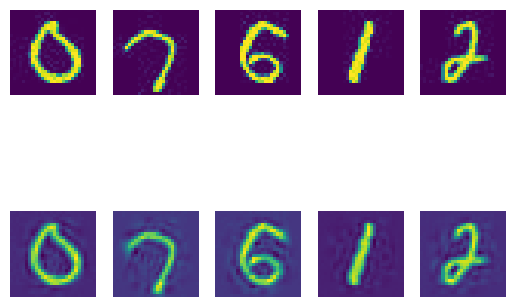

In [63]:
class1 = train_data[0+100, :]
class2 = train_data[2277+100, :]
class3 = train_data[2*2277+100, :]
class4 = train_data[3*2277+100, :]
class5 = train_data[4*2277+100, :]

plt.figure()
plt.subplot(2,5,1)
# plt.title("Original")
plt.imshow(class1.reshape((28,28)))
plt.axis('off')

plt.subplot(2,5,2)
plt.imshow(class2.reshape((28,28)))
plt.axis('off')

plt.subplot(2,5,3)
plt.imshow(class3.reshape((28,28)))
plt.axis('off')

plt.subplot(2,5,4)
plt.imshow(class4.reshape((28,28)))
plt.axis('off')

plt.subplot(2,5,5)
plt.imshow(class5.reshape((28,28)))
plt.axis('off')

plt.subplot(2,5,6)
# plt.title("Original")
recon_class1 = model.predict(class1.reshape((1, -1)))
plt.imshow(recon_class1.reshape((28,28)))
plt.axis('off')

plt.subplot(2,5,7)
recon_class2 = model.predict(class2.reshape((1, -1)))
plt.imshow(recon_class2.reshape((28,28)))
plt.axis('off')

plt.subplot(2,5,8)
recon_class3 = model.predict(class3.reshape((1, -1)))
plt.imshow(recon_class3.reshape((28,28)))
plt.axis('off')

plt.subplot(2,5,9)
recon_class4 = model.predict(class4.reshape((1, -1)))
plt.imshow(recon_class4.reshape((28,28)))
plt.axis('off')

plt.subplot(2,5,10)
recon_class5 = model.predict(class5.reshape((1, -1)))
plt.imshow(recon_class5.reshape((28,28)))
plt.axis('off')
plt.savefig('train_recon_128_1layer.png')


1/1 [==============================] - 0s 8ms/step


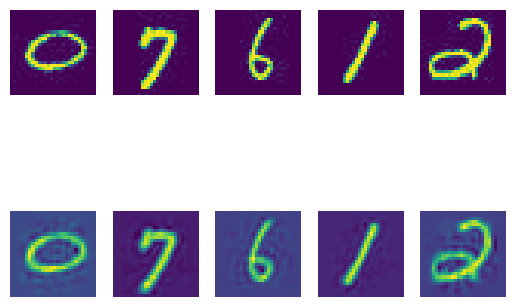

In [64]:
class1 = test_data[0+100, :]
class2 = test_data[759+100, :]
class3 = test_data[2*759+100, :]
class4 = test_data[3*759+100, :]
class5 = test_data[4*759+100, :]
# model.summary()

plt.figure()
plt.subplot(2,5,1)
# plt.title("Original")
plt.imshow(class1.reshape((28,28)))
plt.axis('off')

plt.subplot(2,5,2)
plt.imshow(class2.reshape((28,28)))
plt.axis('off')

plt.subplot(2,5,3)
plt.imshow(class3.reshape((28,28)))
plt.axis('off')

plt.subplot(2,5,4)
plt.imshow(class4.reshape((28,28)))
plt.axis('off')

plt.subplot(2,5,5)
plt.imshow(class5.reshape((28,28)))
plt.axis('off')

plt.subplot(2,5,6)
# plt.title("Original")
recon_class1 = model.predict(class1.reshape((1, -1)))
plt.imshow(recon_class1.reshape((28,28)))
plt.axis('off')

plt.subplot(2,5,7)
recon_class2 = model.predict(class2.reshape((1, -1)))
plt.imshow(recon_class2.reshape((28,28)))
plt.axis('off')

plt.subplot(2,5,8)
recon_class3 = model.predict(class3.reshape((1, -1)))
plt.imshow(recon_class3.reshape((28,28)))
plt.axis('off')

plt.subplot(2,5,9)
recon_class4 = model.predict(class4.reshape((1, -1)))
plt.imshow(recon_class4.reshape((28,28)))
plt.axis('off')

plt.subplot(2,5,10)
recon_class5 = model.predict(class5.reshape((1, -1)))
plt.imshow(recon_class5.reshape((28,28)))
plt.axis('off')
plt.savefig('test_recon_128_1layer.png')


1/1 [==============================] - 0s 8ms/step


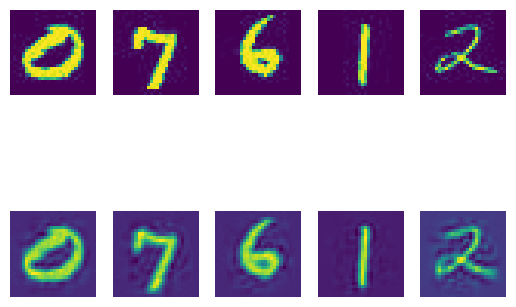

In [65]:
class1 = val_data[0+100, :]
class2 = val_data[759+100, :]
class3 = val_data[2*759+100, :]
class4 = val_data[3*759+100, :]
class5 = val_data[4*759+100, :]
# model.summary()

plt.figure()
plt.subplot(2,5,1)
# plt.title("Original")
plt.imshow(class1.reshape((28,28)))
plt.axis('off')

plt.subplot(2,5,2)
plt.imshow(class2.reshape((28,28)))
plt.axis('off')

plt.subplot(2,5,3)
plt.imshow(class3.reshape((28,28)))
plt.axis('off')

plt.subplot(2,5,4)
plt.imshow(class4.reshape((28,28)))
plt.axis('off')

plt.subplot(2,5,5)
plt.imshow(class5.reshape((28,28)))
plt.axis('off')

plt.subplot(2,5,6)
# plt.title("Original")
recon_class1 = model.predict(class1.reshape((1, -1)))
plt.imshow(recon_class1.reshape((28,28)))
plt.axis('off')

plt.subplot(2,5,7)
recon_class2 = model.predict(class2.reshape((1, -1)))
plt.imshow(recon_class2.reshape((28,28)))
plt.axis('off')

plt.subplot(2,5,8)
recon_class3 = model.predict(class3.reshape((1, -1)))
plt.imshow(recon_class3.reshape((28,28)))
plt.axis('off')

plt.subplot(2,5,9)
recon_class4 = model.predict(class4.reshape((1, -1)))
plt.imshow(recon_class4.reshape((28,28)))
plt.axis('off')

plt.subplot(2,5,10)
recon_class5 = model.predict(class5.reshape((1, -1)))
plt.imshow(recon_class5.reshape((28,28)))
plt.axis('off')
plt.savefig('val_recon_128_1layer.png')


In [66]:
train_pred = model.predict(train_data)
test_pred = model.predict(test_data)
val_pred = model.predict(val_data)

print("Reconstrunction error")
print("Training: ", np.average(((train_data - train_pred)**2)))
print("Testing: ", np.average(((test_data - test_pred)**2)))
print("Validation: ", np.average(((val_data - val_pred)**2)))


119/119 [==============================] - 0s 370us/step
Reconstrunction error
Training:  0.004285603290618591
Testing:  0.0044725503962147715
Validation:  0.004410288113719939


### Model 1

In [67]:
encoder = load_model("./autoencoder_models/encoder_1layer_128.h5")
encoded_train = encoder.predict(train_data)
encoded_test = encoder.predict(test_data)
encoded_val = encoder.predict(val_data)

119/119 [==============================] - 0s 269us/step


In [68]:
inputs = Input(shape=(128,), name="Input")
x = Dense(16, activation='tanh', name="Layer1")(inputs)
x = Dense(8, activation='tanh', name="Layer2")(x)
# x = Dense(128, activation='tanh', name="Layer3")(x)
# x = Dense(64, activation='tanh', name="Layer4")(x)
outputs = Dense(5, activation='softmax', name="Output")(x)
model = Model(inputs=inputs, outputs=outputs, name=f"Model-encoder{128}")
model.summary()

adam_optimizer = Adam(learning_rate = 0.001)

model.compile(optimizer=adam_optimizer,
                loss="sparse_categorical_crossentropy",
                metrics=['accuracy'])
earlystopping = EarlyStopping(monitor='loss',
                                min_delta=1e-4,
                                patience=5,
                                verbose=1)
history1 = model.fit(x=encoded_train, y=train_labels,
                        batch_size=32, epochs=100_000,
                        callbacks=[earlystopping],
                        verbose=0, shuffle=True,
                        validation_split=0.0)

Model: "Model-encoder128"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input (InputLayer)          [(None, 128)]             0         
                                                                 
 Layer1 (Dense)              (None, 16)                2064      
                                                                 
 Layer2 (Dense)              (None, 8)                 136       
                                                                 
 Output (Dense)              (None, 5)                 45        
                                                                 
Total params: 2,245
Trainable params: 2,245
Non-trainable params: 0
_________________________________________________________________
Epoch 71: early stopping


In [69]:
print("Training data evaluation")
model.evaluate(encoded_train, train_labels)
print("Testing data evaluation")
model.evaluate(encoded_test, test_labels)
print("Validation data evaluation")
model.evaluate(encoded_val, val_labels)
print()

Training data evaluation
356/356 [==============================] - 0s 257us/step - loss: 0.0012 - accuracy: 0.9997
Testing data evaluation
119/119 [==============================] - 0s 251us/step - loss: 0.1337 - accuracy: 0.9787
Validation data evaluation
119/119 [==============================] - 0s 248us/step - loss: 0.0936 - accuracy: 0.9837



### Model 2

In [70]:
inputs = Input(shape=(128,), name="Input")
x = Dense(256, activation='tanh', name="Layer1")(inputs)
x = Dense(128, activation='tanh', name="Layer2")(x)
x = Dense(64, activation='tanh', name="Layer3")(x)
x = Dense(32, activation='tanh', name="Layer4")(x)
outputs = Dense(5, activation='softmax', name="Output")(x)
model = Model(inputs=inputs, outputs=outputs, name=f"Model-encoder{128}")
model.summary()

adam_optimizer = Adam(learning_rate = 0.001)

model.compile(optimizer=adam_optimizer,
                    loss="sparse_categorical_crossentropy",
                    metrics=['accuracy'])
earlystopping = EarlyStopping(monitor='loss',
                                        min_delta=1e-4,
                                        patience=5,
                                        verbose=1)
history1 = model.fit(x=encoded_train, y=train_labels,
                        batch_size=32, epochs=100_000,
                        callbacks=[earlystopping],
                        verbose=0, shuffle=True,
                        validation_split=0.0)

Model: "Model-encoder128"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input (InputLayer)          [(None, 128)]             0         
                                                                 
 Layer1 (Dense)              (None, 256)               33024     
                                                                 
 Layer2 (Dense)              (None, 128)               32896     
                                                                 
 Layer3 (Dense)              (None, 64)                8256      
                                                                 
 Layer4 (Dense)              (None, 32)                2080      
                                                                 
 Output (Dense)              (None, 5)                 165       
                                                                 
Total params: 76,421
Trainable params: 76,421
Non-

In [71]:
print("Training data evaluation")
model.evaluate(encoded_train, train_labels)
print("Testing data evaluation")
model.evaluate(encoded_test, test_labels)
print("Validation data evaluation")
model.evaluate(encoded_val, val_labels)
print()

Training data evaluation
356/356 [==============================] - 0s 349us/step - loss: 1.3791e-05 - accuracy: 1.0000
Testing data evaluation
119/119 [==============================] - 0s 360us/step - loss: 0.1003 - accuracy: 0.9829
Validation data evaluation
119/119 [==============================] - 0s 347us/step - loss: 0.0840 - accuracy: 0.9847



## Three layer 128 bottleneck

In [72]:
model = load_model("./autoencoder_models/autoencoder_3layer_128.h5")
model.summary()

Model: "Autoencoder128"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Encoder-input (InputLayer)  [(None, 784)]             0         
                                                                 
 Encoder-hidden (Dense)      (None, 400)               314000    
                                                                 
 Bottleneck-layer (Dense)    (None, 128)               51328     
                                                                 
 Decoder-hidden (Dense)      (None, 400)               51600     
                                                                 
 Decoder-output (Dense)      (None, 784)               314384    
                                                                 
Total params: 731,312
Trainable params: 731,312
Non-trainable params: 0
_________________________________________________________________


1/1 [==============================] - 0s 8ms/step


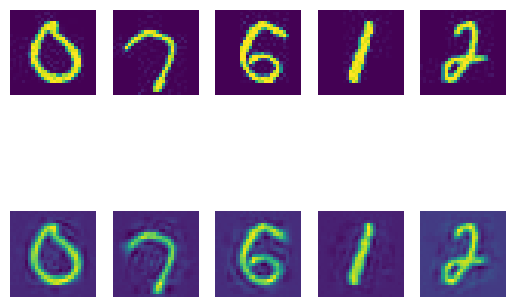

In [73]:
class1 = train_data[0+100, :]
class2 = train_data[2277+100, :]
class3 = train_data[2*2277+100, :]
class4 = train_data[3*2277+100, :]
class5 = train_data[4*2277+100, :]

plt.figure()
plt.subplot(2,5,1)
# plt.title("Original")
plt.imshow(class1.reshape((28,28)))
plt.axis('off')

plt.subplot(2,5,2)
plt.imshow(class2.reshape((28,28)))
plt.axis('off')

plt.subplot(2,5,3)
plt.imshow(class3.reshape((28,28)))
plt.axis('off')

plt.subplot(2,5,4)
plt.imshow(class4.reshape((28,28)))
plt.axis('off')

plt.subplot(2,5,5)
plt.imshow(class5.reshape((28,28)))
plt.axis('off')

plt.subplot(2,5,6)
# plt.title("Original")
recon_class1 = model.predict(class1.reshape((1, -1)))
plt.imshow(recon_class1.reshape((28,28)))
plt.axis('off')

plt.subplot(2,5,7)
recon_class2 = model.predict(class2.reshape((1, -1)))
plt.imshow(recon_class2.reshape((28,28)))
plt.axis('off')

plt.subplot(2,5,8)
recon_class3 = model.predict(class3.reshape((1, -1)))
plt.imshow(recon_class3.reshape((28,28)))
plt.axis('off')

plt.subplot(2,5,9)
recon_class4 = model.predict(class4.reshape((1, -1)))
plt.imshow(recon_class4.reshape((28,28)))
plt.axis('off')

plt.subplot(2,5,10)
recon_class5 = model.predict(class5.reshape((1, -1)))
plt.imshow(recon_class5.reshape((28,28)))
plt.axis('off')
plt.savefig('train_recon_128_3layer.png')


1/1 [==============================] - 0s 8ms/step


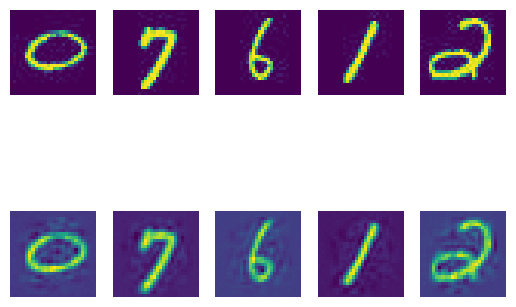

In [74]:
class1 = test_data[0+100, :]
class2 = test_data[759+100, :]
class3 = test_data[2*759+100, :]
class4 = test_data[3*759+100, :]
class5 = test_data[4*759+100, :]
# model.summary()

plt.figure()
plt.subplot(2,5,1)
# plt.title("Original")
plt.imshow(class1.reshape((28,28)))
plt.axis('off')

plt.subplot(2,5,2)
plt.imshow(class2.reshape((28,28)))
plt.axis('off')

plt.subplot(2,5,3)
plt.imshow(class3.reshape((28,28)))
plt.axis('off')

plt.subplot(2,5,4)
plt.imshow(class4.reshape((28,28)))
plt.axis('off')

plt.subplot(2,5,5)
plt.imshow(class5.reshape((28,28)))
plt.axis('off')

plt.subplot(2,5,6)
# plt.title("Original")
recon_class1 = model.predict(class1.reshape((1, -1)))
plt.imshow(recon_class1.reshape((28,28)))
plt.axis('off')

plt.subplot(2,5,7)
recon_class2 = model.predict(class2.reshape((1, -1)))
plt.imshow(recon_class2.reshape((28,28)))
plt.axis('off')

plt.subplot(2,5,8)
recon_class3 = model.predict(class3.reshape((1, -1)))
plt.imshow(recon_class3.reshape((28,28)))
plt.axis('off')

plt.subplot(2,5,9)
recon_class4 = model.predict(class4.reshape((1, -1)))
plt.imshow(recon_class4.reshape((28,28)))
plt.axis('off')

plt.subplot(2,5,10)
recon_class5 = model.predict(class5.reshape((1, -1)))
plt.imshow(recon_class5.reshape((28,28)))
plt.axis('off')
plt.savefig('test_recon_128_3layer.png')


1/1 [==============================] - 0s 8ms/step


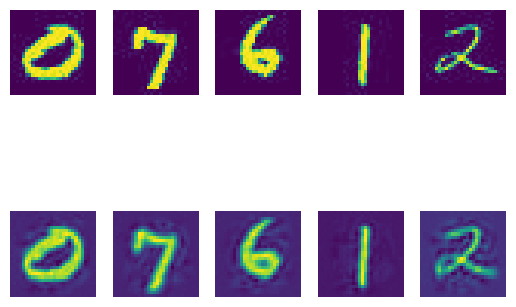

In [75]:
class1 = val_data[0+100, :]
class2 = val_data[759+100, :]
class3 = val_data[2*759+100, :]
class4 = val_data[3*759+100, :]
class5 = val_data[4*759+100, :]
# model.summary()

plt.figure()
plt.subplot(2,5,1)
# plt.title("Original")
plt.imshow(class1.reshape((28,28)))
plt.axis('off')

plt.subplot(2,5,2)
plt.imshow(class2.reshape((28,28)))
plt.axis('off')

plt.subplot(2,5,3)
plt.imshow(class3.reshape((28,28)))
plt.axis('off')

plt.subplot(2,5,4)
plt.imshow(class4.reshape((28,28)))
plt.axis('off')

plt.subplot(2,5,5)
plt.imshow(class5.reshape((28,28)))
plt.axis('off')

plt.subplot(2,5,6)
# plt.title("Original")
recon_class1 = model.predict(class1.reshape((1, -1)))
plt.imshow(recon_class1.reshape((28,28)))
plt.axis('off')

plt.subplot(2,5,7)
recon_class2 = model.predict(class2.reshape((1, -1)))
plt.imshow(recon_class2.reshape((28,28)))
plt.axis('off')

plt.subplot(2,5,8)
recon_class3 = model.predict(class3.reshape((1, -1)))
plt.imshow(recon_class3.reshape((28,28)))
plt.axis('off')

plt.subplot(2,5,9)
recon_class4 = model.predict(class4.reshape((1, -1)))
plt.imshow(recon_class4.reshape((28,28)))
plt.axis('off')

plt.subplot(2,5,10)
recon_class5 = model.predict(class5.reshape((1, -1)))
plt.imshow(recon_class5.reshape((28,28)))
plt.axis('off')
plt.savefig('val_recon_128_3layer.png')


In [76]:
train_pred = model.predict(train_data)
test_pred = model.predict(test_data)
val_pred = model.predict(val_data)

print("Reconstrunction error")
print("Training: ", np.average(((train_data - train_pred)**2)))
print("Testing: ", np.average(((test_data - test_pred)**2)))
print("Validation: ", np.average(((val_data - val_pred)**2)))


119/119 [==============================] - 0s 653us/step
Reconstrunction error
Training:  0.0047163026838620324
Testing:  0.004906904448400423
Validation:  0.00484773383474533


### Model 1

In [152]:
encoder = load_model("./autoencoder_models/encoder_3layer_128.h5")
encoded_train = encoder.predict(train_data)
encoded_test = encoder.predict(test_data)
encoded_val = encoder.predict(val_data)

119/119 [==============================] - 0s 408us/step


In [78]:
inputs = Input(shape=(128,), name="Input")
x = Dense(16, activation='tanh', name="Layer1")(inputs)
x = Dense(8, activation='tanh', name="Layer2")(x)
# x = Dense(128, activation='tanh', name="Layer3")(x)
# x = Dense(64, activation='tanh', name="Layer4")(x)
outputs = Dense(5, activation='softmax', name="Output")(x)
model = Model(inputs=inputs, outputs=outputs, name=f"Model-encoder{128}")
model.summary()

adam_optimizer = Adam(learning_rate = 0.001)

model.compile(optimizer=adam_optimizer,
                loss="sparse_categorical_crossentropy",
                metrics=['accuracy'])
earlystopping = EarlyStopping(monitor='loss',
                                min_delta=1e-4,
                                patience=5,
                                verbose=1)
history1 = model.fit(x=encoded_train, y=train_labels,
                        batch_size=32, epochs=100_000,
                        callbacks=[earlystopping],
                        verbose=0, shuffle=True,
                        validation_split=0.0)

Model: "Model-encoder128"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input (InputLayer)          [(None, 128)]             0         
                                                                 
 Layer1 (Dense)              (None, 16)                2064      
                                                                 
 Layer2 (Dense)              (None, 8)                 136       
                                                                 
 Output (Dense)              (None, 5)                 45        
                                                                 
Total params: 2,245
Trainable params: 2,245
Non-trainable params: 0
_________________________________________________________________
Epoch 66: early stopping


In [79]:
print("Training data evaluation")
model.evaluate(encoded_train, train_labels)
print("Testing data evaluation")
model.evaluate(encoded_test, test_labels)
print("Validation data evaluation")
model.evaluate(encoded_val, val_labels)
print()

Training data evaluation
356/356 [==============================] - 0s 244us/step - loss: 0.0011 - accuracy: 0.9999
Testing data evaluation
119/119 [==============================] - 0s 245us/step - loss: 0.1322 - accuracy: 0.9768
Validation data evaluation
119/119 [==============================] - 0s 268us/step - loss: 0.0910 - accuracy: 0.9829



### Model 2

In [153]:
inputs = Input(shape=(128,), name="Input")
x = Dense(256, activation='tanh', name="Layer1")(inputs)
x = Dense(128, activation='tanh', name="Layer2")(x)
x = Dense(64, activation='tanh', name="Layer3")(x)
x = Dense(32, activation='tanh', name="Layer4")(x)
outputs = Dense(5, activation='softmax', name="Output")(x)
model = Model(inputs=inputs, outputs=outputs, name=f"Model-encoder{128}")
model.summary()

adam_optimizer = Adam(learning_rate = 0.001)

model.compile(optimizer=adam_optimizer,
                    loss="sparse_categorical_crossentropy",
                    metrics=['accuracy'])
earlystopping = EarlyStopping(monitor='loss',
                                        min_delta=1e-4,
                                        patience=5,
                                        verbose=1)
history1 = model.fit(x=encoded_train, y=train_labels,
                        batch_size=32, epochs=100_000,
                        callbacks=[earlystopping],
                        verbose=0, shuffle=True,
                        validation_split=0.0)

Model: "Model-encoder128"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input (InputLayer)          [(None, 128)]             0         
                                                                 
 Layer1 (Dense)              (None, 256)               33024     
                                                                 
 Layer2 (Dense)              (None, 128)               32896     
                                                                 
 Layer3 (Dense)              (None, 64)                8256      
                                                                 
 Layer4 (Dense)              (None, 32)                2080      
                                                                 
 Output (Dense)              (None, 5)                 165       
                                                                 
Total params: 76,421
Trainable params: 76,421
Non-

In [154]:
print("Training data evaluation")
model.evaluate(encoded_train, train_labels)
print("Testing data evaluation")
model.evaluate(encoded_test, test_labels)
print("Validation data evaluation")
model.evaluate(encoded_val, val_labels)
print()

Training data evaluation
356/356 [==============================] - 0s 356us/step - loss: 0.0137 - accuracy: 0.9956
Testing data evaluation
119/119 [==============================] - 0s 372us/step - loss: 0.1050 - accuracy: 0.9792
Validation data evaluation
119/119 [==============================] - 0s 380us/step - loss: 0.0609 - accuracy: 0.9845



## One layer 256 bottleneck

In [147]:
model = load_model("./autoencoder_models/autoencoder_1layer_256.h5")
model.summary()

Model: "Autoencoder256"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Encoder-input (InputLayer)  [(None, 784)]             0         
                                                                 
 Bottleneck-layer (Dense)    (None, 256)               200960    
                                                                 
 Decoder-output (Dense)      (None, 784)               201488    
                                                                 
Total params: 402,448
Trainable params: 402,448
Non-trainable params: 0
_________________________________________________________________


1/1 [==============================] - 0s 8ms/step


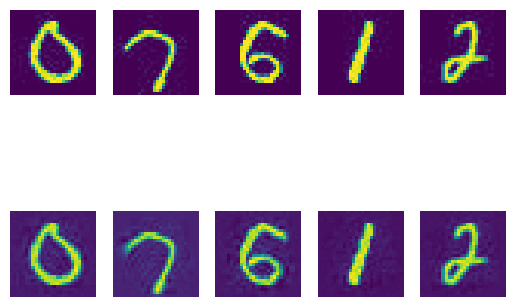

In [83]:
class1 = train_data[0+100, :]
class2 = train_data[2277+100, :]
class3 = train_data[2*2277+100, :]
class4 = train_data[3*2277+100, :]
class5 = train_data[4*2277+100, :]

plt.figure()
plt.subplot(2,5,1)
# plt.title("Original")
plt.imshow(class1.reshape((28,28)))
plt.axis('off')

plt.subplot(2,5,2)
plt.imshow(class2.reshape((28,28)))
plt.axis('off')

plt.subplot(2,5,3)
plt.imshow(class3.reshape((28,28)))
plt.axis('off')

plt.subplot(2,5,4)
plt.imshow(class4.reshape((28,28)))
plt.axis('off')

plt.subplot(2,5,5)
plt.imshow(class5.reshape((28,28)))
plt.axis('off')

plt.subplot(2,5,6)
# plt.title("Original")
recon_class1 = model.predict(class1.reshape((1, -1)))
plt.imshow(recon_class1.reshape((28,28)))
plt.axis('off')

plt.subplot(2,5,7)
recon_class2 = model.predict(class2.reshape((1, -1)))
plt.imshow(recon_class2.reshape((28,28)))
plt.axis('off')

plt.subplot(2,5,8)
recon_class3 = model.predict(class3.reshape((1, -1)))
plt.imshow(recon_class3.reshape((28,28)))
plt.axis('off')

plt.subplot(2,5,9)
recon_class4 = model.predict(class4.reshape((1, -1)))
plt.imshow(recon_class4.reshape((28,28)))
plt.axis('off')

plt.subplot(2,5,10)
recon_class5 = model.predict(class5.reshape((1, -1)))
plt.imshow(recon_class5.reshape((28,28)))
plt.axis('off')
plt.savefig('train_recon_256_1layer.png')


1/1 [==============================] - 0s 8ms/step


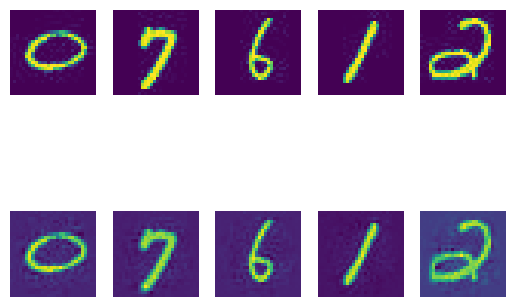

In [84]:
class1 = test_data[0+100, :]
class2 = test_data[759+100, :]
class3 = test_data[2*759+100, :]
class4 = test_data[3*759+100, :]
class5 = test_data[4*759+100, :]
# model.summary()

plt.figure()
plt.subplot(2,5,1)
# plt.title("Original")
plt.imshow(class1.reshape((28,28)))
plt.axis('off')

plt.subplot(2,5,2)
plt.imshow(class2.reshape((28,28)))
plt.axis('off')

plt.subplot(2,5,3)
plt.imshow(class3.reshape((28,28)))
plt.axis('off')

plt.subplot(2,5,4)
plt.imshow(class4.reshape((28,28)))
plt.axis('off')

plt.subplot(2,5,5)
plt.imshow(class5.reshape((28,28)))
plt.axis('off')

plt.subplot(2,5,6)
# plt.title("Original")
recon_class1 = model.predict(class1.reshape((1, -1)))
plt.imshow(recon_class1.reshape((28,28)))
plt.axis('off')

plt.subplot(2,5,7)
recon_class2 = model.predict(class2.reshape((1, -1)))
plt.imshow(recon_class2.reshape((28,28)))
plt.axis('off')

plt.subplot(2,5,8)
recon_class3 = model.predict(class3.reshape((1, -1)))
plt.imshow(recon_class3.reshape((28,28)))
plt.axis('off')

plt.subplot(2,5,9)
recon_class4 = model.predict(class4.reshape((1, -1)))
plt.imshow(recon_class4.reshape((28,28)))
plt.axis('off')

plt.subplot(2,5,10)
recon_class5 = model.predict(class5.reshape((1, -1)))
plt.imshow(recon_class5.reshape((28,28)))
plt.axis('off')
plt.savefig('test_recon_256_1layer.png')


1/1 [==============================] - 0s 8ms/step


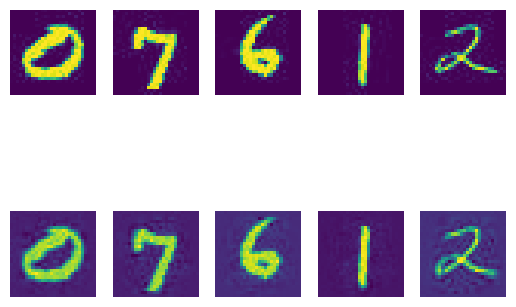

In [85]:
class1 = val_data[0+100, :]
class2 = val_data[759+100, :]
class3 = val_data[2*759+100, :]
class4 = val_data[3*759+100, :]
class5 = val_data[4*759+100, :]
# model.summary()

plt.figure()
plt.subplot(2,5,1)
# plt.title("Original")
plt.imshow(class1.reshape((28,28)))
plt.axis('off')

plt.subplot(2,5,2)
plt.imshow(class2.reshape((28,28)))
plt.axis('off')

plt.subplot(2,5,3)
plt.imshow(class3.reshape((28,28)))
plt.axis('off')

plt.subplot(2,5,4)
plt.imshow(class4.reshape((28,28)))
plt.axis('off')

plt.subplot(2,5,5)
plt.imshow(class5.reshape((28,28)))
plt.axis('off')

plt.subplot(2,5,6)
# plt.title("Original")
recon_class1 = model.predict(class1.reshape((1, -1)))
plt.imshow(recon_class1.reshape((28,28)))
plt.axis('off')

plt.subplot(2,5,7)
recon_class2 = model.predict(class2.reshape((1, -1)))
plt.imshow(recon_class2.reshape((28,28)))
plt.axis('off')

plt.subplot(2,5,8)
recon_class3 = model.predict(class3.reshape((1, -1)))
plt.imshow(recon_class3.reshape((28,28)))
plt.axis('off')

plt.subplot(2,5,9)
recon_class4 = model.predict(class4.reshape((1, -1)))
plt.imshow(recon_class4.reshape((28,28)))
plt.axis('off')

plt.subplot(2,5,10)
recon_class5 = model.predict(class5.reshape((1, -1)))
plt.imshow(recon_class5.reshape((28,28)))
plt.axis('off')
plt.savefig('val_recon_256_1layer.png')


In [86]:
train_pred = model.predict(train_data)
test_pred = model.predict(test_data)
val_pred = model.predict(val_data)

print("Reconstrunction error")
print("Training: ", np.average(((train_data - train_pred)**2)))
print("Testing: ", np.average(((test_data - test_pred)**2)))
print("Validation: ", np.average(((val_data - val_pred)**2)))


119/119 [==============================] - 0s 471us/step
Reconstrunction error
Training:  0.0016925421382986098
Testing:  0.0018267059957372339
Validation:  0.001807815814762678


### Model 1

In [148]:
encoder = load_model("./autoencoder_models/encoder_1layer_256.h5")
encoded_train = encoder.predict(train_data)
encoded_test = encoder.predict(test_data)
encoded_val = encoder.predict(val_data)

119/119 [==============================] - 0s 313us/step


In [88]:
inputs = Input(shape=(256,), name="Input")
x = Dense(16, activation='tanh', name="Layer1")(inputs)
x = Dense(8, activation='tanh', name="Layer2")(x)
# x = Dense(128, activation='tanh', name="Layer3")(x)
# x = Dense(64, activation='tanh', name="Layer4")(x)
outputs = Dense(5, activation='softmax', name="Output")(x)
model = Model(inputs=inputs, outputs=outputs, name=f"Model-encoder{256}")
model.summary()

adam_optimizer = Adam(learning_rate = 0.001)

model.compile(optimizer=adam_optimizer,
                loss="sparse_categorical_crossentropy",
                metrics=['accuracy'])
earlystopping = EarlyStopping(monitor='loss',
                                min_delta=1e-4,
                                patience=5,
                                verbose=1)
history1 = model.fit(x=encoded_train, y=train_labels,
                        batch_size=32, epochs=100_000,
                        callbacks=[earlystopping],
                        verbose=0, shuffle=True,
                        validation_split=0.0)

Model: "Model-encoder256"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input (InputLayer)          [(None, 256)]             0         
                                                                 
 Layer1 (Dense)              (None, 16)                4112      
                                                                 
 Layer2 (Dense)              (None, 8)                 136       
                                                                 
 Output (Dense)              (None, 5)                 45        
                                                                 
Total params: 4,293
Trainable params: 4,293
Non-trainable params: 0
_________________________________________________________________
Epoch 56: early stopping


In [89]:
print("Training data evaluation")
model.evaluate(encoded_train, train_labels)
print("Testing data evaluation")
model.evaluate(encoded_test, test_labels)
print("Validation data evaluation")
model.evaluate(encoded_val, val_labels)
print()

Training data evaluation
356/356 [==============================] - 0s 252us/step - loss: 3.5542e-05 - accuracy: 1.0000
Testing data evaluation
119/119 [==============================] - 0s 249us/step - loss: 0.1258 - accuracy: 0.9779
Validation data evaluation
119/119 [==============================] - 0s 282us/step - loss: 0.0997 - accuracy: 0.9826



### Model 2

In [149]:
inputs = Input(shape=(256,), name="Input")
x = Dense(256, activation='tanh', name="Layer1")(inputs)
x = Dense(128, activation='tanh', name="Layer2")(x)
x = Dense(64, activation='tanh', name="Layer3")(x)
x = Dense(32, activation='tanh', name="Layer4")(x)
outputs = Dense(5, activation='softmax', name="Output")(x)
model = Model(inputs=inputs, outputs=outputs, name=f"Model-encoder{256}")
model.summary()

adam_optimizer = Adam(learning_rate = 0.001)

model.compile(optimizer=adam_optimizer,
                    loss="sparse_categorical_crossentropy",
                    metrics=['accuracy'])
earlystopping = EarlyStopping(monitor='loss',
                                        min_delta=1e-4,
                                        patience=5,
                                        verbose=1)
history1 = model.fit(x=encoded_train, y=train_labels,
                        batch_size=32, epochs=100_000,
                        callbacks=[earlystopping],
                        verbose=0, shuffle=True,
                        validation_split=0.0)

Model: "Model-encoder256"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input (InputLayer)          [(None, 256)]             0         
                                                                 
 Layer1 (Dense)              (None, 256)               65792     
                                                                 
 Layer2 (Dense)              (None, 128)               32896     
                                                                 
 Layer3 (Dense)              (None, 64)                8256      
                                                                 
 Layer4 (Dense)              (None, 32)                2080      
                                                                 
 Output (Dense)              (None, 5)                 165       
                                                                 
Total params: 109,189
Trainable params: 109,189
No

In [150]:
print("Training data evaluation")
model.evaluate(encoded_train, train_labels)
print("Testing data evaluation")
model.evaluate(encoded_test, test_labels)
print("Validation data evaluation")
model.evaluate(encoded_val, val_labels)
print()

Training data evaluation
356/356 [==============================] - 0s 375us/step - loss: 4.1342e-05 - accuracy: 1.0000
Testing data evaluation
119/119 [==============================] - 0s 393us/step - loss: 0.0934 - accuracy: 0.9850
Validation data evaluation
119/119 [==============================] - 0s 376us/step - loss: 0.0787 - accuracy: 0.9866



In [151]:
from tensorflow.math import confusion_matrix
pred_test = model.predict(encoded_test)
pred_labels = [np.argmax(label) for label in pred_test]
print(confusion_matrix(test_labels, pred_labels).numpy())

119/119 [==============================] - 0s 445us/step
[[749   1   2   4   3]
 [  0 753   3   1   2]
 [ 10   4 737   4   4]
 [  6   1   2 749   1]
 [  2   3   3   1 750]]


## Three layer 256 bottleneck

In [92]:
model = load_model("./autoencoder_models/autoencoder_3layer_256.h5")
model.summary()

Model: "Autoencoder256"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Encoder-input (InputLayer)  [(None, 784)]             0         
                                                                 
 Encoder-hidden (Dense)      (None, 400)               314000    
                                                                 
 Bottleneck-layer (Dense)    (None, 256)               102656    
                                                                 
 Decoder-hidden (Dense)      (None, 400)               102800    
                                                                 
 Decoder-output (Dense)      (None, 784)               314384    
                                                                 
Total params: 833,840
Trainable params: 833,840
Non-trainable params: 0
_________________________________________________________________


1/1 [==============================] - 0s 9ms/step


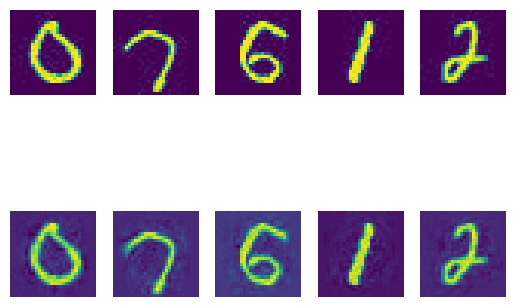

In [93]:
class1 = train_data[0+100, :]
class2 = train_data[2277+100, :]
class3 = train_data[2*2277+100, :]
class4 = train_data[3*2277+100, :]
class5 = train_data[4*2277+100, :]

plt.figure()
plt.subplot(2,5,1)
# plt.title("Original")
plt.imshow(class1.reshape((28,28)))
plt.axis('off')

plt.subplot(2,5,2)
plt.imshow(class2.reshape((28,28)))
plt.axis('off')

plt.subplot(2,5,3)
plt.imshow(class3.reshape((28,28)))
plt.axis('off')

plt.subplot(2,5,4)
plt.imshow(class4.reshape((28,28)))
plt.axis('off')

plt.subplot(2,5,5)
plt.imshow(class5.reshape((28,28)))
plt.axis('off')

plt.subplot(2,5,6)
# plt.title("Original")
recon_class1 = model.predict(class1.reshape((1, -1)))
plt.imshow(recon_class1.reshape((28,28)))
plt.axis('off')

plt.subplot(2,5,7)
recon_class2 = model.predict(class2.reshape((1, -1)))
plt.imshow(recon_class2.reshape((28,28)))
plt.axis('off')

plt.subplot(2,5,8)
recon_class3 = model.predict(class3.reshape((1, -1)))
plt.imshow(recon_class3.reshape((28,28)))
plt.axis('off')

plt.subplot(2,5,9)
recon_class4 = model.predict(class4.reshape((1, -1)))
plt.imshow(recon_class4.reshape((28,28)))
plt.axis('off')

plt.subplot(2,5,10)
recon_class5 = model.predict(class5.reshape((1, -1)))
plt.imshow(recon_class5.reshape((28,28)))
plt.axis('off')
plt.savefig('train_recon_256_3layer.png')


1/1 [==============================] - 0s 8ms/step


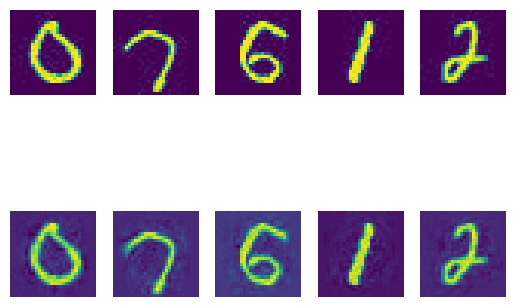

In [94]:
class1 = train_data[0+100, :]
class2 = train_data[2277+100, :]
class3 = train_data[2*2277+100, :]
class4 = train_data[3*2277+100, :]
class5 = train_data[4*2277+100, :]

plt.figure()
plt.subplot(2,5,1)
# plt.title("Original")
plt.imshow(class1.reshape((28,28)))
plt.axis('off')

plt.subplot(2,5,2)
plt.imshow(class2.reshape((28,28)))
plt.axis('off')

plt.subplot(2,5,3)
plt.imshow(class3.reshape((28,28)))
plt.axis('off')

plt.subplot(2,5,4)
plt.imshow(class4.reshape((28,28)))
plt.axis('off')

plt.subplot(2,5,5)
plt.imshow(class5.reshape((28,28)))
plt.axis('off')

plt.subplot(2,5,6)
# plt.title("Original")
recon_class1 = model.predict(class1.reshape((1, -1)))
plt.imshow(recon_class1.reshape((28,28)))
plt.axis('off')

plt.subplot(2,5,7)
recon_class2 = model.predict(class2.reshape((1, -1)))
plt.imshow(recon_class2.reshape((28,28)))
plt.axis('off')

plt.subplot(2,5,8)
recon_class3 = model.predict(class3.reshape((1, -1)))
plt.imshow(recon_class3.reshape((28,28)))
plt.axis('off')

plt.subplot(2,5,9)
recon_class4 = model.predict(class4.reshape((1, -1)))
plt.imshow(recon_class4.reshape((28,28)))
plt.axis('off')

plt.subplot(2,5,10)
recon_class5 = model.predict(class5.reshape((1, -1)))
plt.imshow(recon_class5.reshape((28,28)))
plt.axis('off')
plt.savefig('train_recon_256_3layer.png')


1/1 [==============================] - 0s 8ms/step


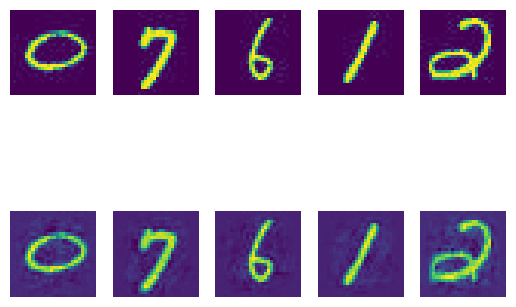

In [95]:
class1 = test_data[0+100, :]
class2 = test_data[759+100, :]
class3 = test_data[2*759+100, :]
class4 = test_data[3*759+100, :]
class5 = test_data[4*759+100, :]
# model.summary()

plt.figure()
plt.subplot(2,5,1)
# plt.title("Original")
plt.imshow(class1.reshape((28,28)))
plt.axis('off')

plt.subplot(2,5,2)
plt.imshow(class2.reshape((28,28)))
plt.axis('off')

plt.subplot(2,5,3)
plt.imshow(class3.reshape((28,28)))
plt.axis('off')

plt.subplot(2,5,4)
plt.imshow(class4.reshape((28,28)))
plt.axis('off')

plt.subplot(2,5,5)
plt.imshow(class5.reshape((28,28)))
plt.axis('off')

plt.subplot(2,5,6)
# plt.title("Original")
recon_class1 = model.predict(class1.reshape((1, -1)))
plt.imshow(recon_class1.reshape((28,28)))
plt.axis('off')

plt.subplot(2,5,7)
recon_class2 = model.predict(class2.reshape((1, -1)))
plt.imshow(recon_class2.reshape((28,28)))
plt.axis('off')

plt.subplot(2,5,8)
recon_class3 = model.predict(class3.reshape((1, -1)))
plt.imshow(recon_class3.reshape((28,28)))
plt.axis('off')

plt.subplot(2,5,9)
recon_class4 = model.predict(class4.reshape((1, -1)))
plt.imshow(recon_class4.reshape((28,28)))
plt.axis('off')

plt.subplot(2,5,10)
recon_class5 = model.predict(class5.reshape((1, -1)))
plt.imshow(recon_class5.reshape((28,28)))
plt.axis('off')
plt.savefig('test_recon_256_3layer.png')


1/1 [==============================] - 0s 9ms/step


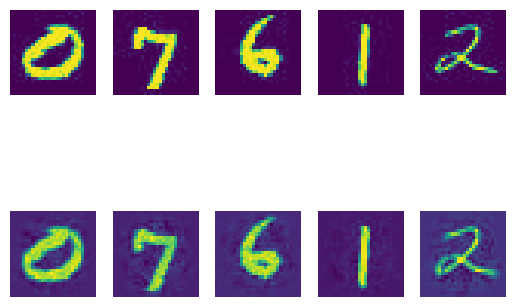

In [96]:
class1 = val_data[0+100, :]
class2 = val_data[759+100, :]
class3 = val_data[2*759+100, :]
class4 = val_data[3*759+100, :]
class5 = val_data[4*759+100, :]
# model.summary()

plt.figure()
plt.subplot(2,5,1)
# plt.title("Original")
plt.imshow(class1.reshape((28,28)))
plt.axis('off')

plt.subplot(2,5,2)
plt.imshow(class2.reshape((28,28)))
plt.axis('off')

plt.subplot(2,5,3)
plt.imshow(class3.reshape((28,28)))
plt.axis('off')

plt.subplot(2,5,4)
plt.imshow(class4.reshape((28,28)))
plt.axis('off')

plt.subplot(2,5,5)
plt.imshow(class5.reshape((28,28)))
plt.axis('off')

plt.subplot(2,5,6)
# plt.title("Original")
recon_class1 = model.predict(class1.reshape((1, -1)))
plt.imshow(recon_class1.reshape((28,28)))
plt.axis('off')

plt.subplot(2,5,7)
recon_class2 = model.predict(class2.reshape((1, -1)))
plt.imshow(recon_class2.reshape((28,28)))
plt.axis('off')

plt.subplot(2,5,8)
recon_class3 = model.predict(class3.reshape((1, -1)))
plt.imshow(recon_class3.reshape((28,28)))
plt.axis('off')

plt.subplot(2,5,9)
recon_class4 = model.predict(class4.reshape((1, -1)))
plt.imshow(recon_class4.reshape((28,28)))
plt.axis('off')

plt.subplot(2,5,10)
recon_class5 = model.predict(class5.reshape((1, -1)))
plt.imshow(recon_class5.reshape((28,28)))
plt.axis('off')
plt.savefig('val_recon_256_3layer.png')


In [97]:
train_pred = model.predict(train_data)
test_pred = model.predict(test_data)
val_pred = model.predict(val_data)

print("Reconstrunction error")
print("Training: ", np.average(((train_data - train_pred)**2)))
print("Testing: ", np.average(((test_data - test_pred)**2)))
print("Validation: ", np.average(((val_data - val_pred)**2)))


119/119 [==============================] - 0s 726us/step
Reconstrunction error
Training:  0.0023194904598621293
Testing:  0.002486794032449085
Validation:  0.002455422841670905


### Model 1

In [98]:
encoder = load_model("./autoencoder_models/encoder_3layer_256.h5")
encoded_train = encoder.predict(train_data)
encoded_test = encoder.predict(test_data)
encoded_val = encoder.predict(val_data)

119/119 [==============================] - 0s 421us/step


In [99]:
inputs = Input(shape=(256,), name="Input")
x = Dense(16, activation='tanh', name="Layer1")(inputs)
x = Dense(8, activation='tanh', name="Layer2")(x)
# x = Dense(128, activation='tanh', name="Layer3")(x)
# x = Dense(64, activation='tanh', name="Layer4")(x)
outputs = Dense(5, activation='softmax', name="Output")(x)
model = Model(inputs=inputs, outputs=outputs, name=f"Model-encoder{256}")
model.summary()

adam_optimizer = Adam(learning_rate = 0.001)

model.compile(optimizer=adam_optimizer,
                loss="sparse_categorical_crossentropy",
                metrics=['accuracy'])
earlystopping = EarlyStopping(monitor='loss',
                                min_delta=1e-4,
                                patience=5,
                                verbose=1)
history1 = model.fit(x=encoded_train, y=train_labels,
                        batch_size=32, epochs=100_000,
                        callbacks=[earlystopping],
                        verbose=0, shuffle=True,
                        validation_split=0.0)

Model: "Model-encoder256"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input (InputLayer)          [(None, 256)]             0         
                                                                 
 Layer1 (Dense)              (None, 16)                4112      
                                                                 
 Layer2 (Dense)              (None, 8)                 136       
                                                                 
 Output (Dense)              (None, 5)                 45        
                                                                 
Total params: 4,293
Trainable params: 4,293
Non-trainable params: 0
_________________________________________________________________
Epoch 53: early stopping


In [100]:
print("Training data evaluation")
model.evaluate(encoded_train, train_labels)
print("Testing data evaluation")
model.evaluate(encoded_test, test_labels)
print("Validation data evaluation")
model.evaluate(encoded_val, val_labels)
print()

Training data evaluation
356/356 [==============================] - 0s 256us/step - loss: 3.6799e-04 - accuracy: 0.9999
Testing data evaluation
119/119 [==============================] - 0s 252us/step - loss: 0.1364 - accuracy: 0.9758
Validation data evaluation
119/119 [==============================] - 0s 258us/step - loss: 0.1075 - accuracy: 0.9794



### Model 2

In [101]:
inputs = Input(shape=(256,), name="Input")
x = Dense(256, activation='tanh', name="Layer1")(inputs)
x = Dense(128, activation='tanh', name="Layer2")(x)
x = Dense(64, activation='tanh', name="Layer3")(x)
x = Dense(32, activation='tanh', name="Layer4")(x)
outputs = Dense(5, activation='softmax', name="Output")(x)
model = Model(inputs=inputs, outputs=outputs, name=f"Model-encoder{256}")
model.summary()

adam_optimizer = Adam(learning_rate = 0.001)

model.compile(optimizer=adam_optimizer,
                    loss="sparse_categorical_crossentropy",
                    metrics=['accuracy'])
earlystopping = EarlyStopping(monitor='loss',
                                        min_delta=1e-4,
                                        patience=5,
                                        verbose=1)
history1 = model.fit(x=encoded_train, y=train_labels,
                        batch_size=32, epochs=100_000,
                        callbacks=[earlystopping],
                        verbose=0, shuffle=True,
                        validation_split=0.0)

Model: "Model-encoder256"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input (InputLayer)          [(None, 256)]             0         
                                                                 
 Layer1 (Dense)              (None, 256)               65792     
                                                                 
 Layer2 (Dense)              (None, 128)               32896     
                                                                 
 Layer3 (Dense)              (None, 64)                8256      
                                                                 
 Layer4 (Dense)              (None, 32)                2080      
                                                                 
 Output (Dense)              (None, 5)                 165       
                                                                 
Total params: 109,189
Trainable params: 109,189
No

In [102]:
print("Training data evaluation")
model.evaluate(encoded_train, train_labels)
print("Testing data evaluation")
model.evaluate(encoded_test, test_labels)
print("Validation data evaluation")
model.evaluate(encoded_val, val_labels)
print()

Training data evaluation
356/356 [==============================] - 0s 373us/step - loss: 0.0055 - accuracy: 0.9980
Testing data evaluation
119/119 [==============================] - 0s 390us/step - loss: 0.1012 - accuracy: 0.9787
Validation data evaluation
119/119 [==============================] - 0s 369us/step - loss: 0.0664 - accuracy: 0.9855



# Denoising Autoencoder

## 20% noise

In [103]:
model = load_model("./denoising-autoencoder_models/autoencoder_1layer_0.2.h5")


Model: "Autoencoder128"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Encoder-input (InputLayer)  [(None, 784)]             0         
                                                                 
 Bottleneck-layer (Dense)    (None, 128)               100480    
                                                                 
 Decoder-output (Dense)      (None, 784)               101136    
                                                                 
Total params: 201,616
Trainable params: 201,616
Non-trainable params: 0
_________________________________________________________________
1/1 [==============================] - 0s 7ms/step


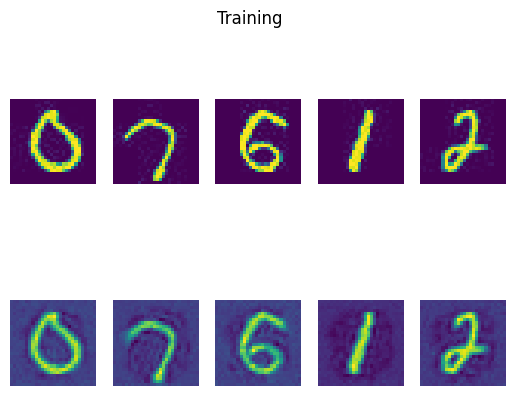

In [104]:
model.summary()

class1 = train_data[0+100, :]
class2 = train_data[2277+100, :]
class3 = train_data[2*2277+100, :]
class4 = train_data[3*2277+100, :]
class5 = train_data[4*2277+100, :]
plt.figure()
plt.subplot(2,5,1)
# plt.title("Original")
plt.imshow(class1.reshape((28,28)))
plt.axis('off')

plt.subplot(2,5,2)
plt.imshow(class2.reshape((28,28)))
plt.axis('off')

plt.subplot(2,5,3)
plt.imshow(class3.reshape((28,28)))
plt.axis('off')

plt.subplot(2,5,4)
plt.imshow(class4.reshape((28,28)))
plt.axis('off')

plt.subplot(2,5,5)
plt.imshow(class5.reshape((28,28)))
plt.axis('off')

plt.subplot(2,5,6)
# plt.title("Original")
recon_class1 = model.predict(class1.reshape((1, -1)))
plt.imshow(recon_class1.reshape((28,28)))
plt.axis('off')

plt.subplot(2,5,7)
recon_class2 = model.predict(class2.reshape((1, -1)))
plt.imshow(recon_class2.reshape((28,28)))
plt.axis('off')

plt.subplot(2,5,8)
recon_class3 = model.predict(class3.reshape((1, -1)))
plt.imshow(recon_class3.reshape((28,28)))
plt.axis('off')

plt.subplot(2,5,9)
recon_class4 = model.predict(class4.reshape((1, -1)))
plt.imshow(recon_class4.reshape((28,28)))
plt.axis('off')

plt.subplot(2,5,10)
recon_class5 = model.predict(class5.reshape((1, -1)))
plt.imshow(recon_class5.reshape((28,28)))
plt.axis('off')

plt.suptitle("Training")
plt.savefig('train_denoising_recon.png')

Model: "Autoencoder128"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Encoder-input (InputLayer)  [(None, 784)]             0         
                                                                 
 Bottleneck-layer (Dense)    (None, 128)               100480    
                                                                 
 Decoder-output (Dense)      (None, 784)               101136    
                                                                 
Total params: 201,616
Trainable params: 201,616
Non-trainable params: 0
_________________________________________________________________
1/1 [==============================] - 0s 8ms/step


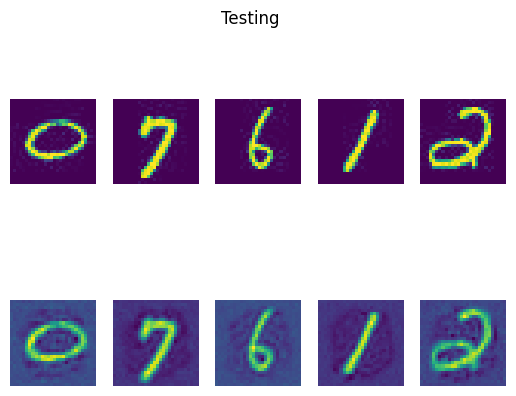

In [105]:
model.summary()

class1 = test_data[0+100, :]
class2 = test_data[759+100, :]
class3 = test_data[2*759+100, :]
class4 = test_data[3*759+100, :]
class5 = test_data[4*759+100, :]
plt.figure()
plt.subplot(2,5,1)
# plt.title("Original")
plt.imshow(class1.reshape((28,28)))
plt.axis('off')

plt.subplot(2,5,2)
plt.imshow(class2.reshape((28,28)))
plt.axis('off')

plt.subplot(2,5,3)
plt.imshow(class3.reshape((28,28)))
plt.axis('off')

plt.subplot(2,5,4)
plt.imshow(class4.reshape((28,28)))
plt.axis('off')

plt.subplot(2,5,5)
plt.imshow(class5.reshape((28,28)))
plt.axis('off')

plt.subplot(2,5,6)
# plt.title("Original")
recon_class1 = model.predict(class1.reshape((1, -1)))
plt.imshow(recon_class1.reshape((28,28)))
plt.axis('off')

plt.subplot(2,5,7)
recon_class2 = model.predict(class2.reshape((1, -1)))
plt.imshow(recon_class2.reshape((28,28)))
plt.axis('off')

plt.subplot(2,5,8)
recon_class3 = model.predict(class3.reshape((1, -1)))
plt.imshow(recon_class3.reshape((28,28)))
plt.axis('off')

plt.subplot(2,5,9)
recon_class4 = model.predict(class4.reshape((1, -1)))
plt.imshow(recon_class4.reshape((28,28)))
plt.axis('off')

plt.subplot(2,5,10)
recon_class5 = model.predict(class5.reshape((1, -1)))
plt.imshow(recon_class5.reshape((28,28)))
plt.axis('off')

plt.suptitle("Testing")
plt.savefig('test_denoising_recon.png')


Model: "Autoencoder128"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Encoder-input (InputLayer)  [(None, 784)]             0         
                                                                 
 Bottleneck-layer (Dense)    (None, 128)               100480    
                                                                 
 Decoder-output (Dense)      (None, 784)               101136    
                                                                 
Total params: 201,616
Trainable params: 201,616
Non-trainable params: 0
_________________________________________________________________
1/1 [==============================] - 0s 8ms/step


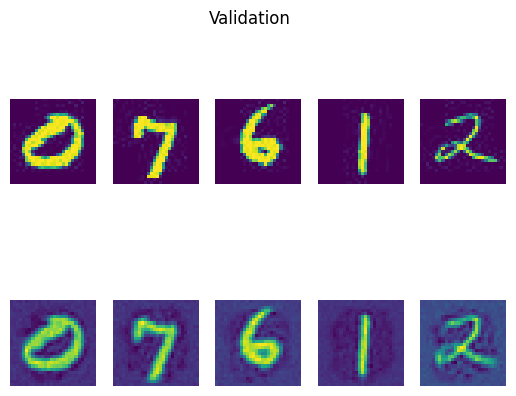

In [106]:
model.summary()

class1 = val_data[0+100, :]
class2 = val_data[759+100, :]
class3 = val_data[2*759+100, :]
class4 = val_data[3*759+100, :]
class5 = val_data[4*759+100, :]
plt.figure()
plt.subplot(2,5,1)
# plt.title("Original")
plt.imshow(class1.reshape((28,28)))
plt.axis('off')

plt.subplot(2,5,2)
plt.imshow(class2.reshape((28,28)))
plt.axis('off')

plt.subplot(2,5,3)
plt.imshow(class3.reshape((28,28)))
plt.axis('off')

plt.subplot(2,5,4)
plt.imshow(class4.reshape((28,28)))
plt.axis('off')

plt.subplot(2,5,5)
plt.imshow(class5.reshape((28,28)))
plt.axis('off')

plt.subplot(2,5,6)
# plt.title("Original")
recon_class1 = model.predict(class1.reshape((1, -1)))
plt.imshow(recon_class1.reshape((28,28)))
plt.axis('off')

plt.subplot(2,5,7)
recon_class2 = model.predict(class2.reshape((1, -1)))
plt.imshow(recon_class2.reshape((28,28)))
plt.axis('off')

plt.subplot(2,5,8)
recon_class3 = model.predict(class3.reshape((1, -1)))
plt.imshow(recon_class3.reshape((28,28)))
plt.axis('off')

plt.subplot(2,5,9)
recon_class4 = model.predict(class4.reshape((1, -1)))
plt.imshow(recon_class4.reshape((28,28)))
plt.axis('off')

plt.subplot(2,5,10)
recon_class5 = model.predict(class5.reshape((1, -1)))
plt.imshow(recon_class5.reshape((28,28)))
plt.axis('off')

plt.suptitle("Validation")
plt.savefig('val_denoising_recon.png')


In [107]:
train_pred = model.predict(train_data)
test_pred = model.predict(test_data)
val_pred = model.predict(val_data)

print("Reconstrunction error")
print("Training: ", np.average(((train_data - train_pred)**2)))
print("Testing: ", np.average(((test_data - test_pred)**2)))
print("Validation: ", np.average(((val_data - val_pred)**2)))


119/119 [==============================] - 0s 353us/step
Reconstrunction error
Training:  0.007248617178237551
Testing:  0.0074237410847973135
Validation:  0.007372290906845215


### FCNN

In [108]:
encoder = load_model("./denoising-autoencoder_models/encoder_1layer_0.2.h5")
encoded_train = encoder.predict(train_data)
encoded_test = encoder.predict(test_data)
encoded_val = encoder.predict(val_data)

119/119 [==============================] - 0s 269us/step


In [109]:
inputs = Input(shape=(128,), name="Input")
x = Dense(256, activation='tanh', name="Layer1")(inputs)
x = Dense(128, activation='tanh', name="Layer2")(x)
x = Dense(64, activation='tanh', name="Layer3")(x)
x = Dense(32, activation='tanh', name="Layer4")(x)
outputs = Dense(5, activation='softmax', name="Output")(x)
model = Model(inputs=inputs, outputs=outputs, name=f"Model-encoder{128}")
model.summary()

adam_optimizer = Adam(learning_rate = 0.001)

model.compile(optimizer=adam_optimizer,
                    loss="sparse_categorical_crossentropy",
                    metrics=['accuracy'])
earlystopping = EarlyStopping(monitor='loss',
                                        min_delta=1e-4,
                                        patience=5,
                                        verbose=1)
history1 = model.fit(x=encoded_train, y=train_labels,
                        batch_size=32, epochs=100_000,
                        callbacks=[earlystopping],
                        verbose=0, shuffle=True,
                        validation_split=0.0)

Model: "Model-encoder128"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input (InputLayer)          [(None, 128)]             0         
                                                                 
 Layer1 (Dense)              (None, 256)               33024     
                                                                 
 Layer2 (Dense)              (None, 128)               32896     
                                                                 
 Layer3 (Dense)              (None, 64)                8256      
                                                                 
 Layer4 (Dense)              (None, 32)                2080      
                                                                 
 Output (Dense)              (None, 5)                 165       
                                                                 
Total params: 76,421
Trainable params: 76,421
Non-

In [110]:
print("Training data evaluation")
model.evaluate(encoded_train, train_labels)
print("Testing data evaluation")
model.evaluate(encoded_test, test_labels)
print("Validation data evaluation")
model.evaluate(encoded_val, val_labels)
print()

Training data evaluation
356/356 [==============================] - 0s 350us/step - loss: 4.3845e-05 - accuracy: 1.0000
Testing data evaluation
119/119 [==============================] - 0s 343us/step - loss: 0.1014 - accuracy: 0.9837
Validation data evaluation
119/119 [==============================] - 0s 348us/step - loss: 0.0744 - accuracy: 0.9866



## 40% noise

In [111]:
model = load_model("./denoising-autoencoder_models/autoencoder_1layer_0.4.h5")


Model: "Autoencoder128"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Encoder-input (InputLayer)  [(None, 784)]             0         
                                                                 
 Bottleneck-layer (Dense)    (None, 128)               100480    
                                                                 
 Decoder-output (Dense)      (None, 784)               101136    
                                                                 
Total params: 201,616
Trainable params: 201,616
Non-trainable params: 0
_________________________________________________________________
1/1 [==============================] - 0s 7ms/step


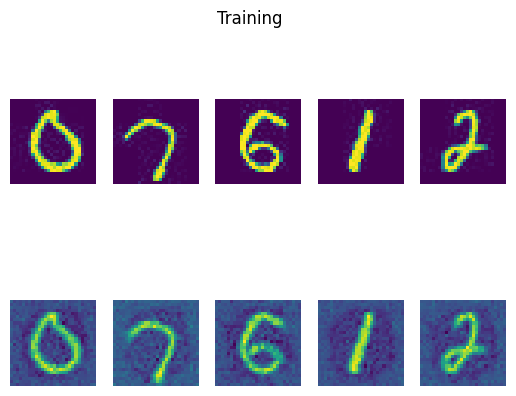

In [112]:
model.summary()

class1 = train_data[0+100, :]
class2 = train_data[2277+100, :]
class3 = train_data[2*2277+100, :]
class4 = train_data[3*2277+100, :]
class5 = train_data[4*2277+100, :]
plt.figure()
plt.subplot(2,5,1)
# plt.title("Original")
plt.imshow(class1.reshape((28,28)))
plt.axis('off')

plt.subplot(2,5,2)
plt.imshow(class2.reshape((28,28)))
plt.axis('off')

plt.subplot(2,5,3)
plt.imshow(class3.reshape((28,28)))
plt.axis('off')

plt.subplot(2,5,4)
plt.imshow(class4.reshape((28,28)))
plt.axis('off')

plt.subplot(2,5,5)
plt.imshow(class5.reshape((28,28)))
plt.axis('off')

plt.subplot(2,5,6)
# plt.title("Original")
recon_class1 = model.predict(class1.reshape((1, -1)))
plt.imshow(recon_class1.reshape((28,28)))
plt.axis('off')

plt.subplot(2,5,7)
recon_class2 = model.predict(class2.reshape((1, -1)))
plt.imshow(recon_class2.reshape((28,28)))
plt.axis('off')

plt.subplot(2,5,8)
recon_class3 = model.predict(class3.reshape((1, -1)))
plt.imshow(recon_class3.reshape((28,28)))
plt.axis('off')

plt.subplot(2,5,9)
recon_class4 = model.predict(class4.reshape((1, -1)))
plt.imshow(recon_class4.reshape((28,28)))
plt.axis('off')

plt.subplot(2,5,10)
recon_class5 = model.predict(class5.reshape((1, -1)))
plt.imshow(recon_class5.reshape((28,28)))
plt.axis('off')

plt.suptitle("Training")
plt.savefig('train_denoising_recon_0.4.png')


Model: "Autoencoder128"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Encoder-input (InputLayer)  [(None, 784)]             0         
                                                                 
 Bottleneck-layer (Dense)    (None, 128)               100480    
                                                                 
 Decoder-output (Dense)      (None, 784)               101136    
                                                                 
Total params: 201,616
Trainable params: 201,616
Non-trainable params: 0
_________________________________________________________________
1/1 [==============================] - 0s 7ms/step


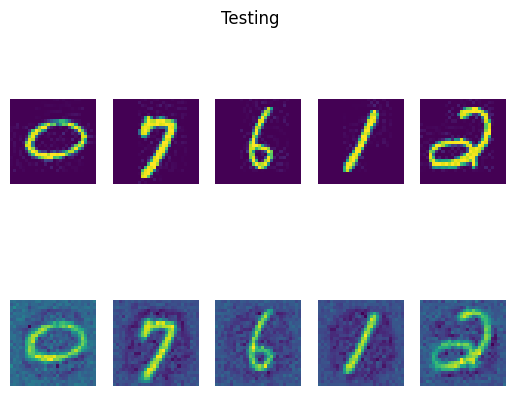

In [113]:
model.summary()

class1 = test_data[0+100, :]
class2 = test_data[759+100, :]
class3 = test_data[2*759+100, :]
class4 = test_data[3*759+100, :]
class5 = test_data[4*759+100, :]
plt.figure()
plt.subplot(2,5,1)
# plt.title("Original")
plt.imshow(class1.reshape((28,28)))
plt.axis('off')

plt.subplot(2,5,2)
plt.imshow(class2.reshape((28,28)))
plt.axis('off')

plt.subplot(2,5,3)
plt.imshow(class3.reshape((28,28)))
plt.axis('off')

plt.subplot(2,5,4)
plt.imshow(class4.reshape((28,28)))
plt.axis('off')

plt.subplot(2,5,5)
plt.imshow(class5.reshape((28,28)))
plt.axis('off')

plt.subplot(2,5,6)
# plt.title("Original")
recon_class1 = model.predict(class1.reshape((1, -1)))
plt.imshow(recon_class1.reshape((28,28)))
plt.axis('off')

plt.subplot(2,5,7)
recon_class2 = model.predict(class2.reshape((1, -1)))
plt.imshow(recon_class2.reshape((28,28)))
plt.axis('off')

plt.subplot(2,5,8)
recon_class3 = model.predict(class3.reshape((1, -1)))
plt.imshow(recon_class3.reshape((28,28)))
plt.axis('off')

plt.subplot(2,5,9)
recon_class4 = model.predict(class4.reshape((1, -1)))
plt.imshow(recon_class4.reshape((28,28)))
plt.axis('off')

plt.subplot(2,5,10)
recon_class5 = model.predict(class5.reshape((1, -1)))
plt.imshow(recon_class5.reshape((28,28)))
plt.axis('off')

plt.suptitle("Testing")
plt.savefig('test_denoising_recon_0.4.png')


Model: "Autoencoder128"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Encoder-input (InputLayer)  [(None, 784)]             0         
                                                                 
 Bottleneck-layer (Dense)    (None, 128)               100480    
                                                                 
 Decoder-output (Dense)      (None, 784)               101136    
                                                                 
Total params: 201,616
Trainable params: 201,616
Non-trainable params: 0
_________________________________________________________________
1/1 [==============================] - 0s 8ms/step


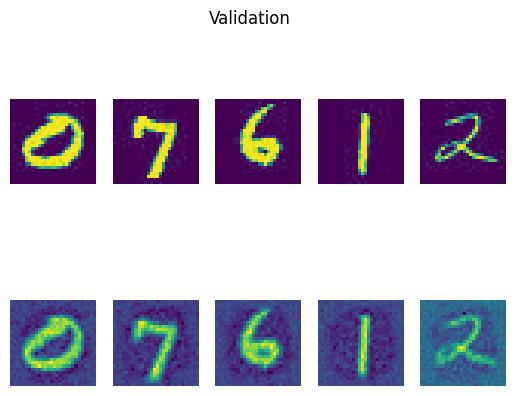

In [114]:
model.summary()

class1 = val_data[0+100, :]
class2 = val_data[759+100, :]
class3 = val_data[2*759+100, :]
class4 = val_data[3*759+100, :]
class5 = val_data[4*759+100, :]
plt.figure()
plt.subplot(2,5,1)
# plt.title("Original")
plt.imshow(class1.reshape((28,28)))
plt.axis('off')

plt.subplot(2,5,2)
plt.imshow(class2.reshape((28,28)))
plt.axis('off')

plt.subplot(2,5,3)
plt.imshow(class3.reshape((28,28)))
plt.axis('off')

plt.subplot(2,5,4)
plt.imshow(class4.reshape((28,28)))
plt.axis('off')

plt.subplot(2,5,5)
plt.imshow(class5.reshape((28,28)))
plt.axis('off')

plt.subplot(2,5,6)
# plt.title("Original")
recon_class1 = model.predict(class1.reshape((1, -1)))
plt.imshow(recon_class1.reshape((28,28)))
plt.axis('off')

plt.subplot(2,5,7)
recon_class2 = model.predict(class2.reshape((1, -1)))
plt.imshow(recon_class2.reshape((28,28)))
plt.axis('off')

plt.subplot(2,5,8)
recon_class3 = model.predict(class3.reshape((1, -1)))
plt.imshow(recon_class3.reshape((28,28)))
plt.axis('off')

plt.subplot(2,5,9)
recon_class4 = model.predict(class4.reshape((1, -1)))
plt.imshow(recon_class4.reshape((28,28)))
plt.axis('off')

plt.subplot(2,5,10)
recon_class5 = model.predict(class5.reshape((1, -1)))
plt.imshow(recon_class5.reshape((28,28)))
plt.axis('off')

plt.suptitle("Validation")
plt.savefig('val_denoising_recon_0.4.png')


In [115]:
train_pred = model.predict(train_data)
test_pred = model.predict(test_data)
val_pred = model.predict(val_data)

print("Reconstrunction error")
print("Training: ", np.average(((train_data - train_pred)**2)))
print("Testing: ", np.average(((test_data - test_pred)**2)))
print("Validation: ", np.average(((val_data - val_pred)**2)))


119/119 [==============================] - 0s 370us/step
Reconstrunction error
Training:  0.01431867927345012
Testing:  0.014486193297946965
Validation:  0.014414857512411611


### FCNN

In [116]:
inputs = Input(shape=(128,), name="Input")
x = Dense(256, activation='tanh', name="Layer1")(inputs)
x = Dense(128, activation='tanh', name="Layer2")(x)
x = Dense(64, activation='tanh', name="Layer3")(x)
x = Dense(32, activation='tanh', name="Layer4")(x)
outputs = Dense(5, activation='softmax', name="Output")(x)
model = Model(inputs=inputs, outputs=outputs, name=f"Model-encoder{128}")
model.summary()

adam_optimizer = Adam(learning_rate = 0.001)

model.compile(optimizer=adam_optimizer,
                    loss="sparse_categorical_crossentropy",
                    metrics=['accuracy'])
earlystopping = EarlyStopping(monitor='loss',
                                        min_delta=1e-4,
                                        patience=5,
                                        verbose=1)
history1 = model.fit(x=encoded_train, y=train_labels,
                        batch_size=32, epochs=100_000,
                        callbacks=[earlystopping],
                        verbose=0, shuffle=True,
                        validation_split=0.0)

Model: "Model-encoder128"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input (InputLayer)          [(None, 128)]             0         
                                                                 
 Layer1 (Dense)              (None, 256)               33024     
                                                                 
 Layer2 (Dense)              (None, 128)               32896     
                                                                 
 Layer3 (Dense)              (None, 64)                8256      
                                                                 
 Layer4 (Dense)              (None, 32)                2080      
                                                                 
 Output (Dense)              (None, 5)                 165       
                                                                 
Total params: 76,421
Trainable params: 76,421
Non-

In [117]:
print("Training data evaluation")
model.evaluate(encoded_train, train_labels)
print("Testing data evaluation")
model.evaluate(encoded_test, test_labels)
print("Validation data evaluation")
model.evaluate(encoded_val, val_labels)
print()

Training data evaluation
356/356 [==============================] - 0s 351us/step - loss: 1.6993e-05 - accuracy: 1.0000
Testing data evaluation
119/119 [==============================] - 0s 343us/step - loss: 0.1140 - accuracy: 0.9823
Validation data evaluation
119/119 [==============================] - 0s 342us/step - loss: 0.0789 - accuracy: 0.9866



# Visualizing weights

## Autoencoder

In [234]:
model = load_model("./autoencoder_models/autoencoder_1layer_128.h5")

In [235]:
weights = model.layers[1].get_weights()
weights[0].shape

(784, 128)

In [236]:
w31 = []

for w in weights[0].T:
    w31.append(w.reshape(28, 28))
    
w31 = np.array(w31)
w31.shape

(128, 28, 28)

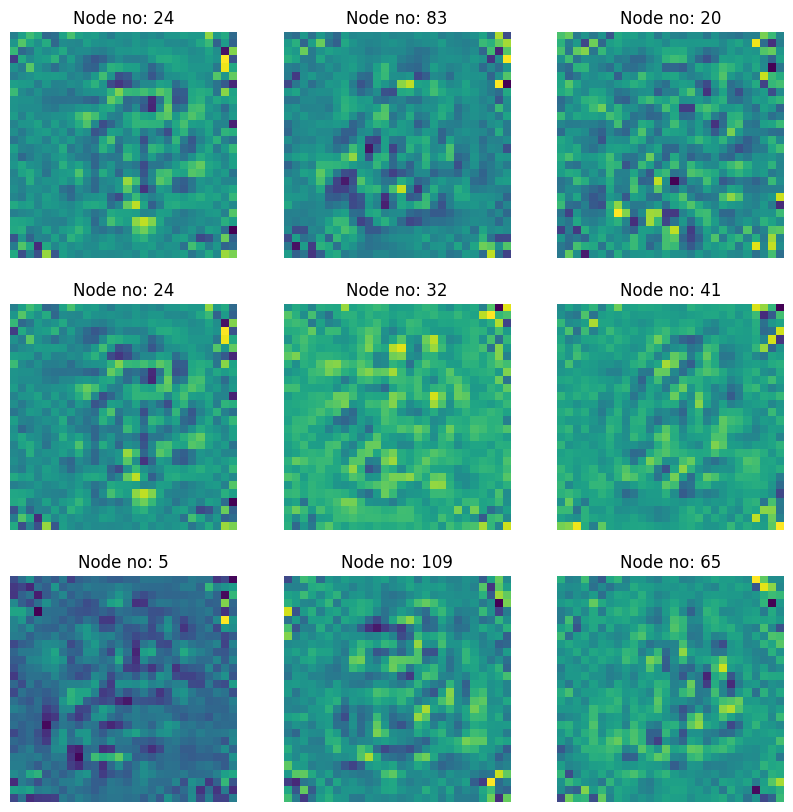

In [237]:
n = 9
plt.figure(figsize=(10, 10))
for i in range(n):
    k = np.random.randint(0, 128)
    ax = plt.subplot(3, 3, i+1)
    plt.title("Node no: "+str(k))
    plt.imshow(w31[k])
    plt.axis('off')
plt.savefig('weights-autoencoder.png', bbox_inches='tight')
plt.show()

## Denoising autoencoder

### 20% noise

In [238]:
model = load_model("./denoising-autoencoder_models/autoencoder_1layer_0.2.h5")

In [239]:
weights = model.layers[1].get_weights()
weights[0].shape

(784, 128)

In [240]:
w31 = []

for w in weights[0].T:
    w31.append(w.reshape(28, 28))
    
w31 = np.array(w31)
w31.shape

(128, 28, 28)

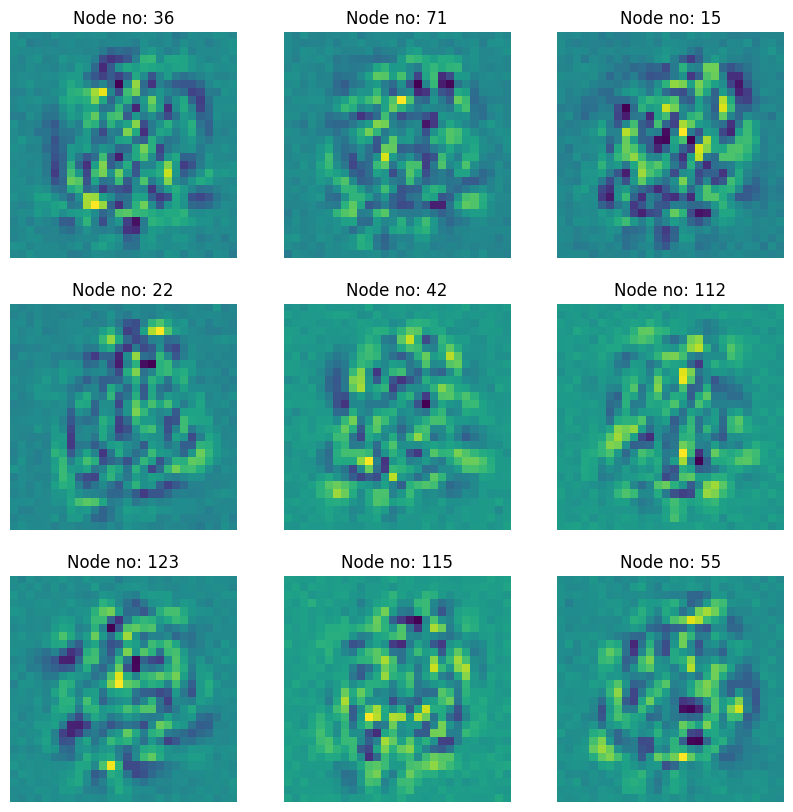

In [241]:
n = 9
plt.figure(figsize=(10, 10))
for i in range(n):
    k = np.random.randint(0, 128)
    ax = plt.subplot(3, 3, i+1)
    plt.title("Node no: "+str(k))
    plt.imshow(w31[k])
    plt.axis('off')
plt.savefig('weights-denoiseing-0.2.png', bbox_inches='tight')
plt.show()

### 40% noise

In [242]:
model = load_model("./denoising-autoencoder_models/autoencoder_1layer_0.4.h5")

In [243]:
weights = model.layers[1].get_weights()
weights[0].shape

(784, 128)

In [244]:
w31 = []

for w in weights[0].T:
    w31.append(w.reshape(28, 28))
    
w31 = np.array(w31)
w31.shape

(128, 28, 28)

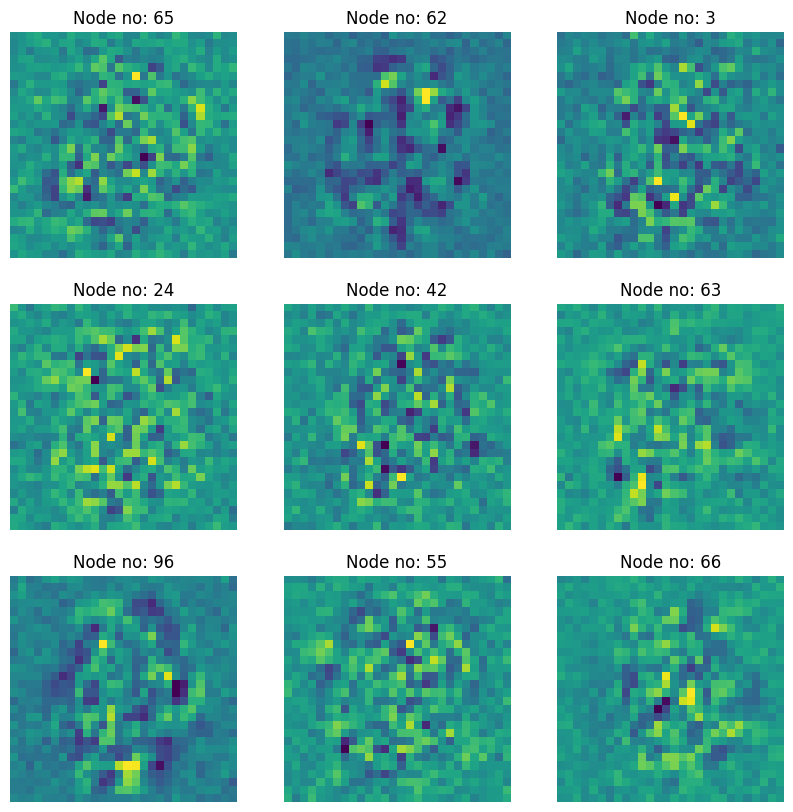

In [245]:
n = 9
plt.figure(figsize=(10, 10))
for i in range(n):
    k = np.random.randint(0, 128)
    ax = plt.subplot(3, 3, i+1)
    plt.title("Node no: "+str(k))
    plt.imshow(w31[k])
    plt.axis('off')
plt.savefig('weights-denoiseing-0.4.png', bbox_inches='tight')
plt.show()